# **New York City Yellow Taxi Data**

## Objective
In this case study you will be learning exploratory data analysis (EDA) with the help of a dataset on yellow taxi rides in New York City. This will enable you to understand why EDA is an important step in the process of data science and machine learning.

## **Problem Statement**
As an analyst at an upcoming taxi operation in NYC, you are tasked to use the 2023 taxi trip data to uncover insights that could help optimise taxi operations. The goal is to analyse patterns in the data that can inform strategic decisions to improve service efficiency, maximise revenue, and enhance passenger experience.

## Tasks
You need to perform the following steps for successfully completing this assignment:
1. Data Loading
2. Data Cleaning
3. Exploratory Analysis: Bivariate and Multivariate
4. Creating Visualisations to Support the Analysis
5. Deriving Insights and Stating Conclusions

---

**NOTE:** The marks given along with headings and sub-headings are cumulative marks for those particular headings/sub-headings.<br>

The actual marks for each task are specified within the tasks themselves.

For example, marks given with heading *2* or sub-heading *2.1* are the cumulative marks, for your reference only. <br>

The marks you will receive for completing tasks are given with the tasks.

Suppose the marks for two tasks are: 3 marks for 2.1.1 and 2 marks for 3.2.2, or
* 2.1.1 [3 marks]
* 3.2.2 [2 marks]

then, you will earn 3 marks for completing task 2.1.1 and 2 marks for completing task 3.2.2.


---

## Data Understanding
The yellow taxi trip records include fields capturing pick-up and drop-off dates/times, pick-up and drop-off locations, trip distances, itemized fares, rate types, payment types, and driver-reported passenger counts.

The data is stored in Parquet format (*.parquet*). The dataset is from 2009 to 2024. However, for this assignment, we will only be using the data from 2023.

The data for each month is present in a different parquet file. You will get twelve files for each of the months in 2023.

The data was collected and provided to the NYC Taxi and Limousine Commission (TLC) by technology providers like vendors and taxi hailing apps. <br>

You can find the link to the TLC trip records page here: https://www.nyc.gov/site/tlc/about/tlc-trip-record-data.page

###  Data Description
You can find the data description here: [Data Dictionary](https://www.nyc.gov/assets/tlc/downloads/pdf/data_dictionary_trip_records_yellow.pdf)

**Trip Records**



|Field Name       |description |
|:----------------|:-----------|
| VendorID | A code indicating the TPEP provider that provided the record. <br> 1= Creative Mobile Technologies, LLC; <br> 2= VeriFone Inc. |
| tpep_pickup_datetime | The date and time when the meter was engaged.  |
| tpep_dropoff_datetime | The date and time when the meter was disengaged.   |
| Passenger_count | The number of passengers in the vehicle. <br> This is a driver-entered value. |
| Trip_distance | The elapsed trip distance in miles reported by the taximeter. |
| PULocationID | TLC Taxi Zone in which the taximeter was engaged |
| DOLocationID | TLC Taxi Zone in which the taximeter was disengaged |
|RateCodeID |The final rate code in effect at the end of the trip.<br> 1 = Standard rate <br> 2 = JFK <br> 3 = Newark <br>4 = Nassau or Westchester <br>5 = Negotiated fare <br>6 = Group ride |
|Store_and_fwd_flag |This flag indicates whether the trip record was held in vehicle memory before sending to the vendor, aka “store and forward,” because the vehicle did not have a connection to the server.  <br>Y= store and forward trip <br>N= not a store and forward trip |
|Payment_type| A numeric code signifying how the passenger paid for the trip. <br> 1 = Credit card <br>2 = Cash <br>3 = No charge <br>4 = Dispute <br>5 = Unknown <br>6 = Voided trip |
|Fare_amount| The time-and-distance fare calculated by the meter. <br>Extra Miscellaneous extras and surcharges.  Currently, this only includes the 0.50 and 1 USD rush hour and overnight charges. |
|MTA_tax |0.50 USD MTA tax that is automatically triggered based on the metered rate in use. |
|Improvement_surcharge | 0.30 USD improvement surcharge assessed trips at the flag drop. The improvement surcharge began being levied in 2015. |
|Tip_amount |Tip amount – This field is automatically populated for credit card tips. Cash tips are not included. |
| Tolls_amount | Total amount of all tolls paid in trip.  |
| total_amount | The total amount charged to passengers. Does not include cash tips. |
|Congestion_Surcharge |Total amount collected in trip for NYS congestion surcharge. |
| Airport_fee | 1.25 USD for pick up only at LaGuardia and John F. Kennedy Airports|

Although the amounts of extra charges and taxes applied are specified in the data dictionary, you will see that some cases have different values of these charges in the actual data.

**Taxi Zones**

Each of the trip records contains a field corresponding to the location of the pickup or drop-off of the trip, populated by numbers ranging from 1-263.

These numbers correspond to taxi zones, which may be downloaded as a table or map/shapefile and matched to the trip records using a join.

This is covered in more detail in later sections.

---

## **1** Data Preparation

<font color = red>[5 marks]</font> <br>

### Import Libraries

In [5]:
# Import warnings

import warnings
warnings.filterwarnings('ignore')


In [6]:
# Import the libraries you will be using for analysis

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [7]:
# Recommended versions
# numpy version: 1.26.4
# pandas version: 2.2.2
# matplotlib version: 3.10.0
# seaborn version: 0.13.2

# Check versions
print("numpy version:", np.__version__)
print("pandas version:", pd.__version__)
print("matplotlib version:", plt.matplotlib.__version__)
print("seaborn version:", sns.__version__)

numpy version: 2.0.2
pandas version: 2.2.2
matplotlib version: 3.10.0
seaborn version: 0.13.2


### **1.1** Load the dataset
<font color = red>[5 marks]</font> <br>

You will see twelve files, one for each month.

To read parquet files with Pandas, you have to follow a similar syntax as that for CSV files.

`df = pd.read_parquet('file.parquet')`

In [11]:
# Try loading one file

df = pd.read_parquet('/content/2023-1.parquet')
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3041714 entries, 0 to 3066765
Data columns (total 19 columns):
 #   Column                 Dtype         
---  ------                 -----         
 0   VendorID               int64         
 1   tpep_pickup_datetime   datetime64[us]
 2   tpep_dropoff_datetime  datetime64[us]
 3   passenger_count        float64       
 4   trip_distance          float64       
 5   RatecodeID             float64       
 6   store_and_fwd_flag     object        
 7   PULocationID           int64         
 8   DOLocationID           int64         
 9   payment_type           int64         
 10  fare_amount            float64       
 11  extra                  float64       
 12  mta_tax                float64       
 13  tip_amount             float64       
 14  tolls_amount           float64       
 15  improvement_surcharge  float64       
 16  total_amount           float64       
 17  congestion_surcharge   float64       
 18  airport_fee            floa

How many rows are there? Do you think handling such a large number of rows is computationally feasible when we have to combine the data for all twelve months into one?

To handle this, we need to sample a fraction of data from each of the files. How to go about that? Think of a way to select only some portion of the data from each month's file that accurately represents the trends.

#### Sampling the Data
> One way is to take a small percentage of entries for pickup in every hour of a date. So, for all the days in a month, we can iterate through the hours and select 5% values randomly from those. Use `tpep_pickup_datetime` for this. Separate date and hour from the datetime values and then for each date, select some fraction of trips for each of the 24 hours.

To sample data, you can use the `sample()` method. Follow this syntax:

```Python
# sampled_data is an empty DF to keep appending sampled data of each hour
# hour_data is the DF of entries for an hour 'X' on a date 'Y'

sample = hour_data.sample(frac = 0.05, random_state = 42)
# sample 0.05 of the hour_data
# random_state is just a seed for sampling, you can define it yourself

sampled_data = pd.concat([sampled_data, sample]) # adding data for this hour to the DF
```

This *sampled_data* will contain 5% values selected at random from each hour.

Note that the code given above is only the part that will be used for sampling and not the complete code required for sampling and combining the data files.

Keep in mind that you sample by date AND hour, not just hour. (Why?)

In [12]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


---

**1.1.1** <font color = red>[5 marks]</font> <br>
Figure out how to sample and combine the files.

**Note:** It is not mandatory to use the method specified above. While sampling, you only need to make sure that your sampled data represents the overall data of all the months accurately.

In [14]:
# Sample the data
# It is recommmended to not load all the files at once to avoid memory overload

In [13]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [15]:
import os
import pandas as pd
import numpy as np
from datetime import datetime

# Example path — adjust based on your folder structure
os.chdir('/content/drive/MyDrive/trip_records')

# Now list and use files
file_list = os.listdir()

# Initialise an empty DataFrame to hold final sampled data
df = pd.DataFrame()

# Iterate through each file
for file_name in file_list:
    try:
        file_path = os.path.join(os.getcwd(), file_name)

        # Read current monthly file (header might need adjustment depending on dataset)
        data = pd.read_parquet(file_path)

        # Ensure datetime column is in correct format (adjust column name as needed)
        if 'tpep_pickup_datetime' in data.columns:
            data['tpep_pickup_datetime'] = pd.to_datetime(data['tpep_pickup_datetime'], errors='coerce')
        else:
            print(f"'tpep_pickup_datetime' column not found in {file_name}")
            continue

        # Drop rows with invalid datetime
        data.dropna(subset=['tpep_pickup_datetime'], inplace=True)

        # Add new columns for date and hour
        data['date'] = data['tpep_pickup_datetime'].dt.date
        data['hour'] = data['tpep_pickup_datetime'].dt.hour

        # Temporary DataFrame for sampled data from this file
        sampled_data = pd.DataFrame()

        # Loop through each unique date
        for current_date in data['date'].unique():
            daily_data = data[data['date'] == current_date]

            # Loop through each hour
            for hour in range(24):
                hourly_data = daily_data[daily_data['hour'] == hour]

                # Sample 5% from this hour's data (at least 1 row if available)
                if not hourly_data.empty:
                    sample = hourly_data.sample(frac=0.05, random_state=42)
                    sampled_data = pd.concat([sampled_data, sample], ignore_index=True)

        # Append to the final DataFrame
        df = pd.concat([df, sampled_data], ignore_index=True)

        print(f"Processed file: {file_name}, Sampled rows: {len(sampled_data)}")

    except Exception as e:
        print(f"Error reading file {file_name}: {e}")


Processed file: 2023-1.parquet, Sampled rows: 152087
Processed file: 2023-2.parquet, Sampled rows: 168696
Processed file: 2023-3.parquet, Sampled rows: 163786
Processed file: 2023-4.parquet, Sampled rows: 139641
Processed file: 2023-5.parquet, Sampled rows: 144458
Processed file: 2023-6.parquet, Sampled rows: 162910
Processed file: 2023-7.parquet, Sampled rows: 174068
Processed file: 2023-8.parquet, Sampled rows: 143782
Processed file: 2023-9.parquet, Sampled rows: 140875
Processed file: 2023-10.parquet, Sampled rows: 174255
Processed file: 2023-11.parquet, Sampled rows: 165133
Processed file: 2023-12.parquet, Sampled rows: 166709
Processed file: new_trip_record, Sampled rows: 99662
Processed file: new_trip_record.parquet, Sampled rows: 104870


After combining the data files into one DataFrame, convert the new DataFrame to a CSV or parquet file and store it to use directly.

Ideally, you can try keeping the total entries to around 250,000 to 300,000.

In [16]:
# Store the df in csv/parquet
df.to_parquet('new_trip_record.parquet')

## **2** Data Cleaning
<font color = red>[30 marks]</font> <br>

Now we can load the new data directly.

In [17]:
# Load the new data file

df = pd.read_parquet('new_trip_record.parquet')

In [18]:
df.head()

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,...,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge,airport_fee,date,hour,Airport_fee
0,2,2023-01-01 00:07:18,2023-01-01 00:23:15,1.0,7.74,1.0,N,138,256,2,...,0.5,0.00,0.0,1.0,41.15,0.0,1.25,2023-01-01,0,NaN
1,2,2023-01-01 00:16:41,2023-01-01 00:21:46,2.0,1.24,1.0,N,161,237,1,...,0.5,2.58,0.0,1.0,15.48,2.5,0.00,2023-01-01,0,NaN
2,2,2023-01-01 00:14:03,2023-01-01 00:24:36,3.0,1.44,1.0,N,237,141,2,...,0.5,0.00,0.0,1.0,16.40,2.5,0.00,2023-01-01,0,NaN
3,2,2023-01-01 00:24:30,2023-01-01 00:29:55,1.0,0.54,1.0,N,143,142,2,...,0.5,0.00,0.0,1.0,11.50,2.5,0.00,2023-01-01,0,NaN
4,2,2023-01-01 00:43:00,2023-01-01 01:01:00,NaN,19.24,NaN,None,66,107,0,...,0.5,5.93,0.0,1.0,35.57,NaN,NaN,2023-01-01,0,NaN


In [19]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2100932 entries, 0 to 2100931
Data columns (total 22 columns):
 #   Column                 Dtype         
---  ------                 -----         
 0   VendorID               int64         
 1   tpep_pickup_datetime   datetime64[us]
 2   tpep_dropoff_datetime  datetime64[us]
 3   passenger_count        float64       
 4   trip_distance          float64       
 5   RatecodeID             float64       
 6   store_and_fwd_flag     object        
 7   PULocationID           int64         
 8   DOLocationID           int64         
 9   payment_type           int64         
 10  fare_amount            float64       
 11  extra                  float64       
 12  mta_tax                float64       
 13  tip_amount             float64       
 14  tolls_amount           float64       
 15  improvement_surcharge  float64       
 16  total_amount           float64       
 17  congestion_surcharge   float64       
 18  airport_fee           

#### **2.1** Fixing Columns
<font color = red>[10 marks]</font> <br>

Fix/drop any columns as you seem necessary in the below sections

**2.1.1** <font color = red>[2 marks]</font> <br>

Fix the index and drop unnecessary columns

In [118]:
# Fix the index and drop any columns that are not needed
df.reset_index(drop=True, inplace=True)

# Drop duplicate or unnecessary columns
columns_to_drop = ['Airport_fee']  # Add more if needed
df.drop(columns=columns_to_drop, inplace=True, errors='ignore')

# Optional: check remaining columns
print(df.columns)
df.head(50)

Index(['VendorID', 'tpep_pickup_datetime', 'tpep_dropoff_datetime',
       'passenger_count', 'trip_distance', 'RatecodeID', 'store_and_fwd_flag',
       'PULocationID', 'DOLocationID', 'payment_type', 'fare_amount', 'extra',
       'mta_tax', 'tip_amount', 'tolls_amount', 'improvement_surcharge',
       'total_amount', 'congestion_surcharge', 'airport_fee', 'date', 'hour',
       'pickup_hour', 'pickup_day', 'pickup_month', 'pickup_quarter',
       'trip_duration', 'day_of_week', 'fare_per_mile', 'tip_percentage',
       'tip_percent', 'pickup_dayofweek'],
      dtype='object')


,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,...,pickup_hour,pickup_day,pickup_month,pickup_quarter,trip_duration,day_of_week,fare_per_mile,tip_percentage,tip_percent,pickup_dayofweek
0,2,2023-01-01 00:07:18,2023-01-01 00:23:15,1.0,0.037782,1.0,N,138,256,2,...,0,Sunday,January,2023Q1,15.950000,6,0.005990,0.000000,0.000000,6
1,2,2023-01-01 00:16:41,2023-01-01 00:21:46,2.0,0.006053,1.0,N,161,237,1,...,0,Sunday,January,2023Q1,5.083333,6,0.009117,10598.252744,20585.638000,6
2,2,2023-01-01 00:14:03,2023-01-01 00:24:36,3.0,0.007029,1.0,N,237,141,2,...,0,Sunday,January,2023Q1,10.550000,6,0.011328,0.000000,0.000000,6
3,2,2023-01-01 00:24:30,2023-01-01 00:29:55,1.0,0.002636,1.0,N,143,142,2,...,0,Sunday,January,2023Q1,5.416667,6,0.017224,0.000000,0.000000,6
4,1,2023-01-01 00:42:56,2023-01-01 01:16:33,2.0,0.034658,1.0,N,246,37,1,...,0,Sunday,January,2023Q1,33.616667,6,0.006953,10664.061302,14634.607131,6
5,2,2023-01-01 00:58:00,2023-01-01 01:08:31,2.0,0.007761,1.0,N,79,164,1,...,0,Sunday,January,2023Q1,10.516667,6,0.010260,10619.020226,18235.619353,6
6,2,2023-01-01 00:16:06,2023-01-01 00:31:59,1.0,0.015425,1.0,N,79,256,1,...,0,Sunday,January,2023Q1,15.883333,6,0.008649,12766.321117,20076.663609,6
7,2,2023-01-01 00:44:09,2023-01-01 01:01:17,1.0,0.037294,1.0,N,132,95,1,...,0,Sunday,January,2023Q1,17.133333,6,0.005937,10660.393819,14288.990547,6
8,1,2023-01-01 00:15:25,2023-01-01 00:22:35,2.0,0.004393,1.0,N,148,114,1,...,0,Sunday,January,2023Q1,7.166667,6,0.012561,4570.025038,7978.929457,6
9,2,2023-01-01 00:14:47,2023-01-01 00:20:18,1.0,0.003807,1.0,N,237,229,2,...,0,Sunday,January,2023Q1,5.516667,6,0.013209,0.000000,0.000000,6


**2.1.2** <font color = red>[3 marks]</font> <br>
There are two airport fee columns. This is possibly an error in naming columns. Let's see whether these can be combined into a single column.

In [117]:
# Combine the two airport fee columns
if 'airport_fee' in df.columns and 'Airport_fee' in df.columns:
    df['airport_fee'] = df['airport_fee'].fillna(df['Airport_fee'])
    df.drop(columns=['Airport_fee'], inplace=True)

**2.1.3** <font color = red>[5 marks]</font> <br>
Fix columns with negative (monetary) values

In [22]:
# check where values of fare amount are negative
df[df['fare_amount'] < 0]


,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,...,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge,airport_fee,date,hour


Did you notice something different in the `RatecodeID` column for above records?

In [23]:
# Analyse RatecodeID for the negative fare amounts
# Check for negative or invalid RatecodeID
df[df['RatecodeID'] < 0]

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,...,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge,airport_fee,date,hour


In [24]:
# Find which columns have negative values
monetary_cols = [
    'fare_amount', 'extra', 'mta_tax', 'tip_amount', 'tolls_amount',
    'improvement_surcharge', 'total_amount', 'congestion_surcharge', 'airport_fee'
]

for col in monetary_cols:
    negatives = df[df[col] < 0]
    print(f"{col}: {len(negatives)} negative values")


fare_amount: 0 negative values
extra: 3 negative values
mta_tax: 80 negative values
tip_amount: 0 negative values
tolls_amount: 0 negative values
improvement_surcharge: 86 negative values
total_amount: 86 negative values
congestion_surcharge: 61 negative values
airport_fee: 1 negative values


In [25]:
# fix these negative values
monetary_cols = [
    'fare_amount', 'extra', 'mta_tax', 'tip_amount', 'tolls_amount',
    'improvement_surcharge', 'total_amount', 'congestion_surcharge', 'airport_fee'
]

for col in monetary_cols:
    df[col] = df[col].clip(lower=0)  # replaces negatives with 0



### **2.2** Handling Missing Values
<font color = red>[10 marks]</font> <br>

**2.2.1**  <font color = red>[2 marks]</font> <br>
Find the proportion of missing values in each column




In [26]:
# Find the proportion of missing values in each column

missing_proportion = df.isna().mean().sort_values(ascending=False)
print(missing_proportion)


airport_fee              0.921725
store_and_fwd_flag       0.034239
congestion_surcharge     0.034239
RatecodeID               0.034239
passenger_count          0.034239
trip_distance            0.000000
tpep_dropoff_datetime    0.000000
tpep_pickup_datetime     0.000000
VendorID                 0.000000
payment_type             0.000000
fare_amount              0.000000
PULocationID             0.000000
DOLocationID             0.000000
mta_tax                  0.000000
extra                    0.000000
tip_amount               0.000000
tolls_amount             0.000000
total_amount             0.000000
improvement_surcharge    0.000000
date                     0.000000
hour                     0.000000
dtype: float64


**2.2.2**  <font color = red>[3 marks]</font> <br>
Handling missing values in `passenger_count`

In [27]:
# Display the rows with null values
# Impute NaN values in 'passenger_count'
df[df.isna().any(axis=1)]
median_passenger = df['passenger_count'].median()
df['passenger_count'] = df['passenger_count'].fillna(median_passenger)

Did you find zeroes in passenger_count? Handle these.

**2.2.3**  <font color = red>[2 marks]</font> <br>
Handle missing values in `RatecodeID`

In [28]:
# Fix missing values in 'RatecodeID'
mode_ratecode = df['RatecodeID'].mode()[0]
df['RatecodeID'] = df['RatecodeID'].fillna(mode_ratecode)


**2.2.4**  <font color = red>[3 marks]</font> <br>
Impute NaN in `congestion_surcharge`

In [29]:
# handle null values in congestion_surcharge

df['congestion_surcharge'] = df['congestion_surcharge'].fillna(0)



Are there missing values in other columns? Did you find NaN values in some other set of columns? Handle those missing values below.

In [30]:
# Handle any remaining missing values

missing_summary = df.isna().sum()
missing_summary = missing_summary[missing_summary > 0]
print(missing_summary)
# Fill airport_fee with 0 assuming it's not charged
if 'airport_fee' in df.columns:
    df['airport_fee'] = df['airport_fee'].fillna(0)

# If you still have 'Airport_fee' column (duplicate), drop it
if 'Airport_fee' in df.columns:
    df.drop(columns='Airport_fee', inplace=True)


store_and_fwd_flag      71934
airport_fee           1936482
dtype: int64


### **2.3** Handling Outliers
<font color = red>[10 marks]</font> <br>

Before we start fixing outliers, let's perform outlier analysis.

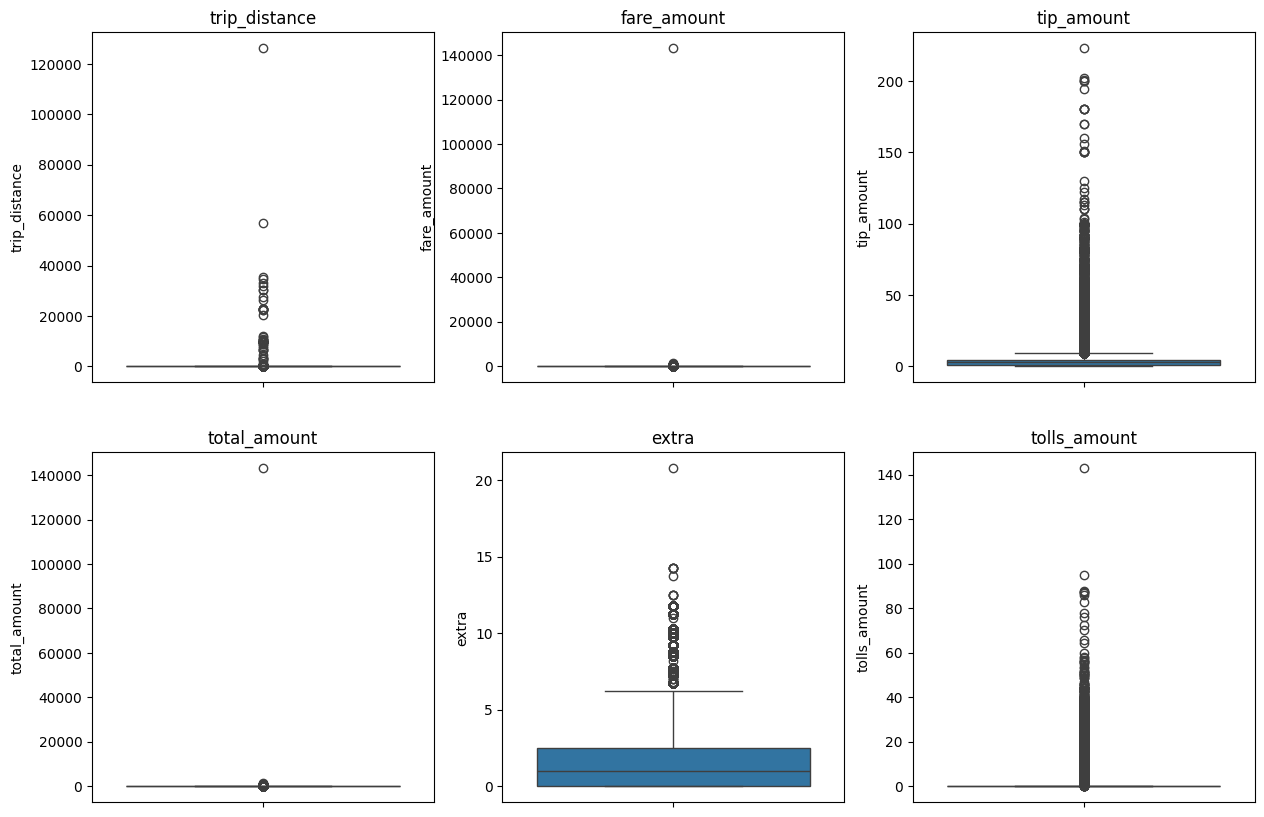

In [31]:
# Describe the data and check if there are any potential outliers present
# Check for potential out of place values in various columns

df.describe()

cols_to_check = ['trip_distance', 'fare_amount', 'tip_amount', 'total_amount', 'extra', 'tolls_amount']

plt.figure(figsize=(15, 10))
for i, col in enumerate(cols_to_check, 1):
    plt.subplot(2, 3, i)
    sns.boxplot(y=df[col])
    plt.title(col)
plt.show()

**2.3.1**  <font color = red>[10 marks]</font> <br>
Based on the above analysis, it seems that some of the outliers are present due to errors in registering the trips. Fix the outliers.

Some points you can look for:
- Entries where `trip_distance` is nearly 0 and `fare_amount` is more than 300
- Entries where `trip_distance` and `fare_amount` are 0 but the pickup and dropoff zones are different (both distance and fare should not be zero for different zones)
- Entries where `trip_distance` is more than 250  miles.
- Entries where `payment_type` is 0 (there is no payment_type 0 defined in the data dictionary)

These are just some suggestions. You can handle outliers in any way you wish, using the insights from above outlier analysis.

How will you fix each of these values? Which ones will you drop and which ones will you replace?

First, let us remove 7+ passenger counts as there are very less instances.

In [32]:
# remove passenger_count > 6
df = df[df['passenger_count'] <= 6]

In [33]:
# Continue with outlier handling
df = df[~((df['trip_distance'] < 0.1) & (df['fare_amount'] > 300))]

df = df[~((df['trip_distance'] == 0) & (df['fare_amount'] == 0) & (df['PULocationID'] != df['DOLocationID']))]

df = df[df['trip_distance'] <= 250]

df = df[df['payment_type'] != 0]


In [34]:
# Do any columns need standardising?
cols_to_scale = ['trip_distance', 'fare_amount', 'total_amount', 'tip_amount', 'tolls_amount']
for col in cols_to_scale:
    df[col] = (df[col] - df[col].min()) / (df[col].max() - df[col].min())


## **3** Exploratory Data Analysis
<font color = red>[90 marks]</font> <br>

In [35]:
df.columns.tolist()

['VendorID',
 'tpep_pickup_datetime',
 'tpep_dropoff_datetime',
 'passenger_count',
 'trip_distance',
 'RatecodeID',
 'store_and_fwd_flag',
 'PULocationID',
 'DOLocationID',
 'payment_type',
 'fare_amount',
 'extra',
 'mta_tax',
 'tip_amount',
 'tolls_amount',
 'improvement_surcharge',
 'total_amount',
 'congestion_surcharge',
 'airport_fee',
 'date',
 'hour']

#### **3.1** General EDA: Finding Patterns and Trends
<font color = red>[40 marks]</font> <br>

**3.1.1** <font color = red>[3 marks]</font> <br>
Categorise the varaibles into Numerical or Categorical.
* `VendorID`:
* `tpep_pickup_datetime`:
* `tpep_dropoff_datetime`:
* `passenger_count`:
* `trip_distance`:
* `RatecodeID`:
* `PULocationID`:
* `DOLocationID`:
* `payment_type`:
* `pickup_hour`:
* `trip_duration`:


The following monetary parameters belong in the same category, is it categorical or numerical?


* `fare_amount`
* `extra`
* `mta_tax`
* `tip_amount`
* `tolls_amount`
* `improvement_surcharge`
* `total_amount`
* `congestion_surcharge`
* `airport_fee`

##### Temporal Analysis

**3.1.2** <font color = red>[5 marks]</font> <br>
Analyse the distribution of taxi pickups by hours, days of the week, and months.

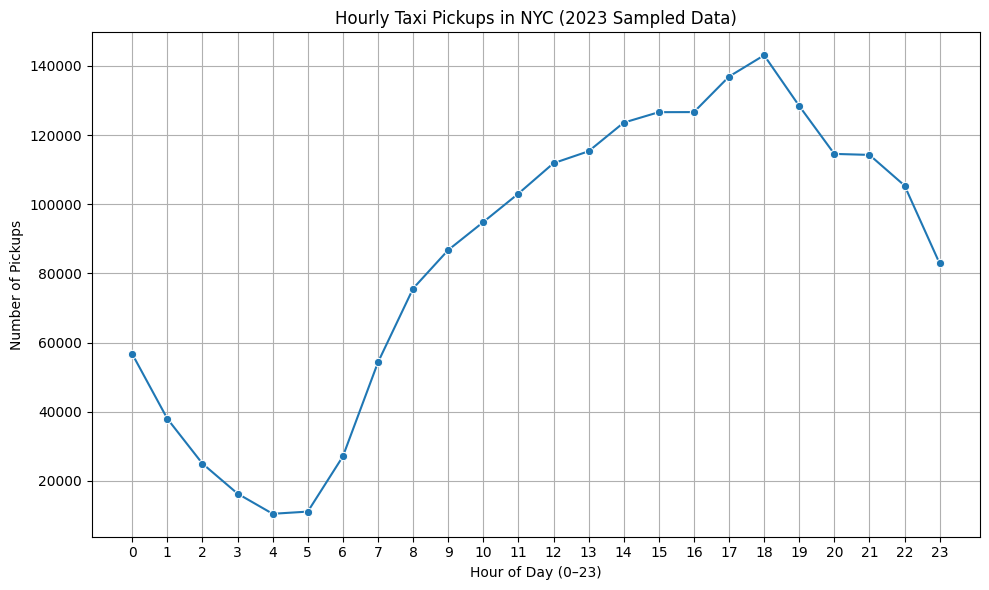

In [36]:
# Find and show the hourly trends in taxi pickups
df['pickup_hour'] = df['tpep_pickup_datetime'].dt.hour
hourly_trend = df.groupby('pickup_hour').size().reset_index(name='pickup_count')

plt.figure(figsize=(10, 6))
sns.lineplot(data=hourly_trend, x='pickup_hour', y='pickup_count', marker='o')
plt.title('Hourly Taxi Pickups in NYC (2023 Sampled Data)')
plt.xlabel('Hour of Day (0–23)')
plt.ylabel('Number of Pickups')
plt.xticks(range(0, 24))
plt.grid(True)
plt.tight_layout()
plt.show()


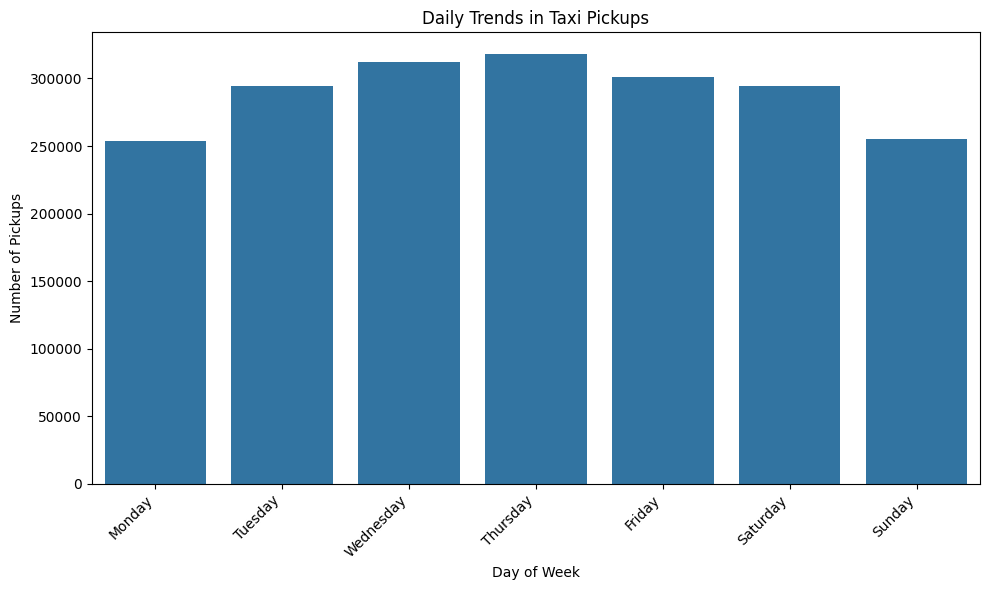

In [37]:
# Find and show the daily trends in taxi pickups (days of the week)

df['pickup_day'] = df['tpep_pickup_datetime'].dt.day_name()

daily_pickups = df.groupby('pickup_day')['tpep_pickup_datetime'].count()

days_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
daily_pickups = daily_pickups.reindex(days_order)

plt.figure(figsize=(10, 6))
sns.barplot(x=daily_pickups.index, y=daily_pickups.values)  # Using Seaborn for better aesthetics
plt.xlabel('Day of Week')
plt.ylabel('Number of Pickups')
plt.title('Daily Trends in Taxi Pickups')
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better readability
plt.tight_layout()
plt.show()

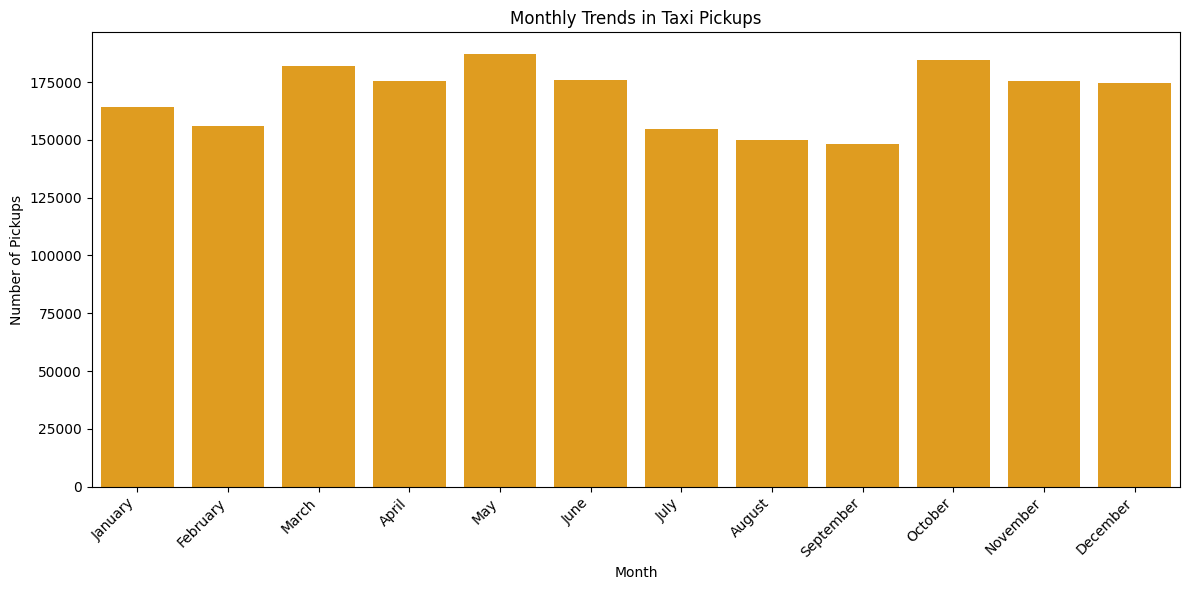

In [39]:

# Show the monthly trends in pickups
df['pickup_month'] = df['tpep_pickup_datetime'].dt.month_name()
monthly_pickups = df.groupby('pickup_month')['tpep_pickup_datetime'].count()
months_order = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December']
monthly_pickups = monthly_pickups.reindex(months_order)

plt.figure(figsize=(12, 6))
sns.barplot(x=monthly_pickups.index, y=monthly_pickups.values,color='orange')
plt.xlabel('Month')
plt.ylabel('Number of Pickups')
plt.title('Monthly Trends in Taxi Pickups')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()


##### Financial Analysis

Take a look at the financial parameters like `fare_amount`, `tip_amount`, `total_amount`, and also `trip_distance`. Do these contain zero/negative values?

In [40]:
# Analyse the above parameters
columns_to_check = ['fare_amount', 'tip_amount', 'total_amount', 'trip_distance']
analysis = pd.DataFrame(columns=columns_to_check)
analysis.loc['Zero Count'] = [ (df[col] == 0).sum() for col in columns_to_check ]
analysis.loc['Negative Count'] = [ (df[col] < 0).sum() for col in columns_to_check ]
analysis.round(2)

,fare_amount,tip_amount,total_amount,trip_distance
Zero Count,643,454458,364,25327
Negative Count,0,0,0,0


Do you think it is beneficial to create a copy DataFrame leaving out the zero values from these?

**3.1.3** <font color = red>[2 marks]</font> <br>
Filter out the zero values from the above columns.

**Note:** The distance might be 0 in cases where pickup and drop is in the same zone. Do you think it is suitable to drop such cases of zero distance?

In [41]:
# Create a df with non zero entries for the selected parameters.

filtered_df = df.copy()

filtered_df = filtered_df[
    (filtered_df['fare_amount'] != 0) &
    (filtered_df['tip_amount'] != 0) &
    (filtered_df['total_amount'] != 0) &
    (filtered_df['trip_distance'] != 0)
]
print(f"Original shape: {df.shape}")
print(f"Filtered shape: {filtered_df.shape}")


Original shape: (2028854, 24)
Filtered shape: (1565277, 24)


**3.1.4** <font color = red>[3 marks]</font> <br>
Analyse the monthly revenue (`total_amount`) trend

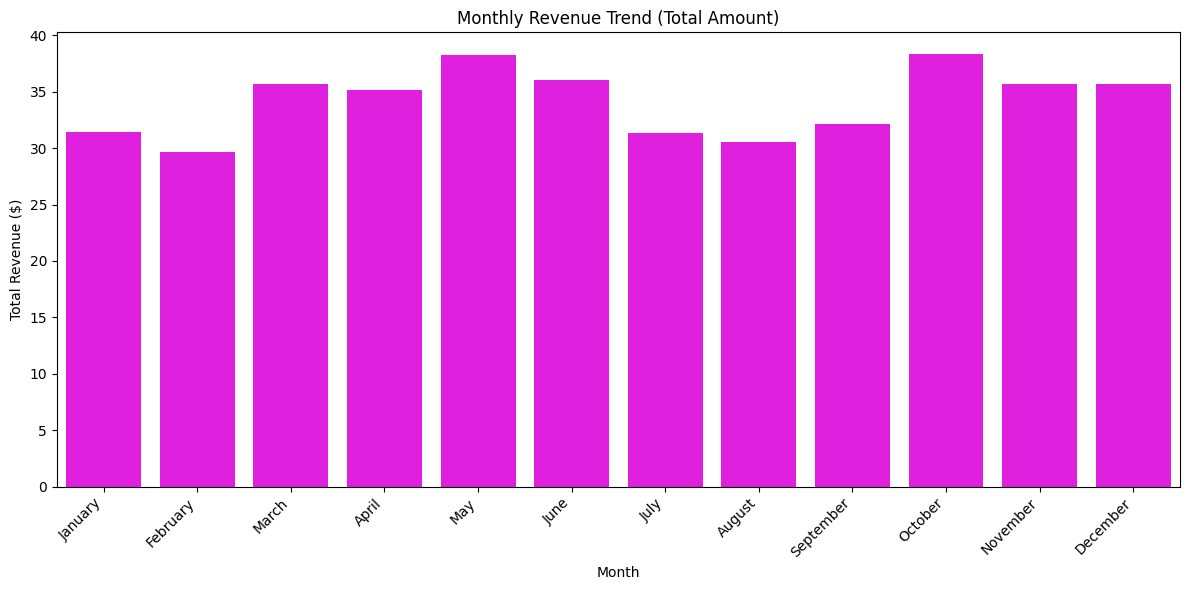

In [43]:
# Group data by month and analyse monthly revenue

if 'pickup_month' not in df.columns:
    df['pickup_month'] = df['tpep_pickup_datetime'].dt.month_name()

monthly_revenue = df.groupby('pickup_month')['total_amount'].sum()
months_order = ['January', 'February', 'March', 'April', 'May', 'June',
                'July', 'August', 'September', 'October', 'November', 'December']
monthly_revenue = monthly_revenue.reindex(months_order)

plt.figure(figsize=(12, 6))
sns.barplot(x=monthly_revenue.index, y=monthly_revenue.values,color='magenta')
plt.title('Monthly Revenue Trend (Total Amount)')
plt.xlabel('Month')
plt.ylabel('Total Revenue ($)')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()


**3.1.5** <font color = red>[3 marks]</font> <br>
Show the proportion of each quarter of the year in the revenue

In [44]:
# Calculate proportion of each quarter
df['pickup_quarter'] = df['tpep_pickup_datetime'].dt.to_period('Q')
quarterly_revenue = df.groupby('pickup_quarter')['total_amount'].sum()
quarterly_proportion = (quarterly_revenue / quarterly_revenue.sum()) * 100
quarterly_proportion.round(2)


,total_amount
pickup_quarter,
2022Q4,0.00
2023Q1,23.61
2023Q2,26.68
2023Q3,22.95
2023Q4,26.76


**3.1.6** <font color = red>[3 marks]</font> <br>
Visualise the relationship between `trip_distance` and `fare_amount`. Also find the correlation value for these two.

**Hint:** You can leave out the trips with trip_distance = 0

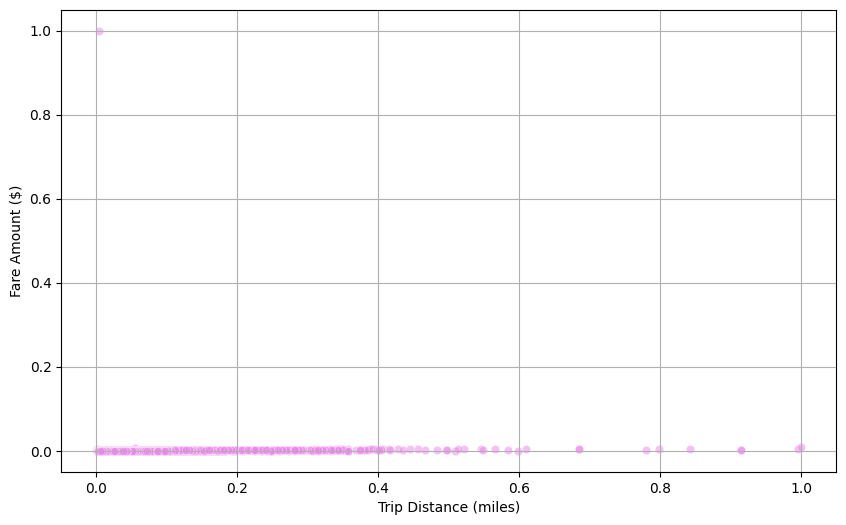

Correlation between trip distance and fare amount (excluding zero distance trips): 0.16


In [46]:
# Show how trip fare is affected by distance
filtered_df = df[df['trip_distance'] > 0]

plt.figure(figsize=(10, 6))
sns.scatterplot(x='trip_distance', y='fare_amount', data=filtered_df, alpha=0.5,color='violet')
plt.xlabel('Trip Distance (miles)')
plt.ylabel('Fare Amount ($)')
plt.grid(True)
plt.show()

correlation = filtered_df['trip_distance'].corr(filtered_df['fare_amount'])
print(f"Correlation between trip distance and fare amount (excluding zero distance trips): {correlation:.2f}")


**3.1.7** <font color = red>[5 marks]</font> <br>
Find and visualise the correlation between:
1. `fare_amount` and trip duration (pickup time to dropoff time)
2. `fare_amount` and `passenger_count`
3. `tip_amount` and `trip_distance`

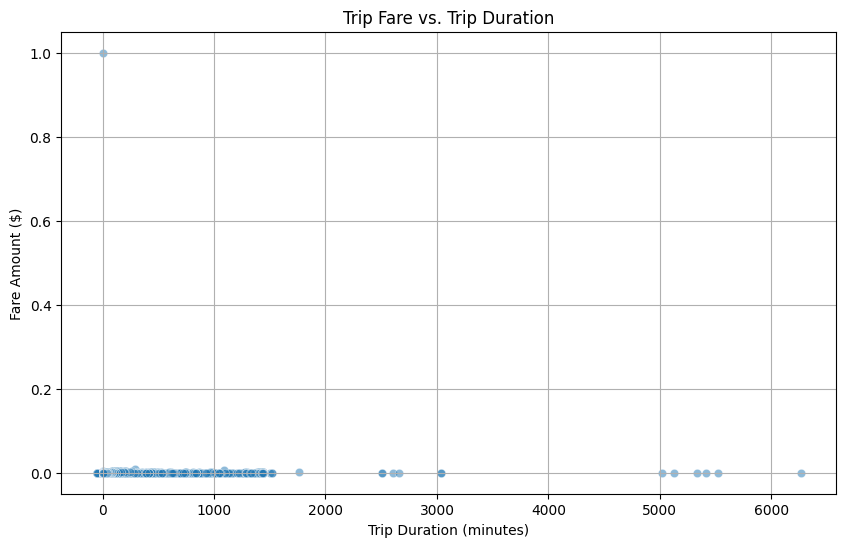

Correlation between trip duration and fare amount: 0.05


In [47]:
# Show relationship between fare and trip duration
df['trip_duration'] = (df['tpep_dropoff_datetime'] - df['tpep_pickup_datetime']).dt.total_seconds() / 60

plt.figure(figsize=(10, 6))
sns.scatterplot(x='trip_duration', y='fare_amount', data=df, alpha=0.5)  # Added alpha for better visibility
plt.title('Trip Fare vs. Trip Duration')
plt.xlabel('Trip Duration (minutes)')
plt.ylabel('Fare Amount ($)')
plt.grid(True)
plt.show()

correlation = df['trip_duration'].corr(df['fare_amount'])
print(f"Correlation between trip duration and fare amount: {correlation:.2f}")


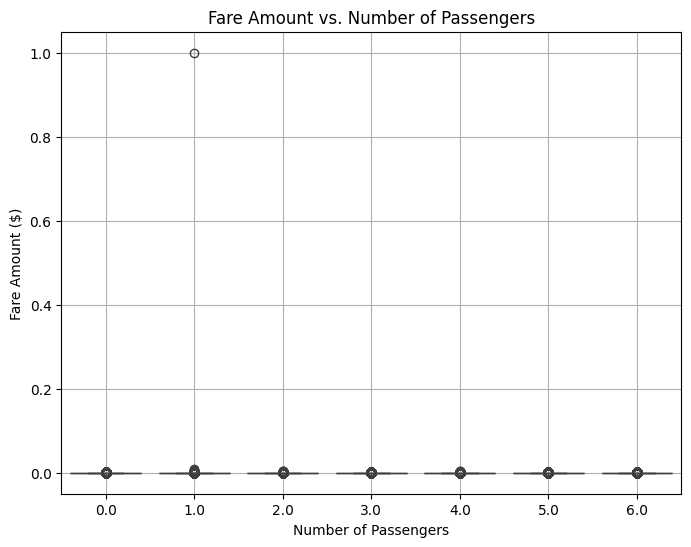

Correlation between passenger count and fare amount: 0.01


In [48]:
# Show relationship between fare and number of passengers
plt.figure(figsize=(8, 6))
sns.boxplot(x='passenger_count', y='fare_amount', data=df)
plt.title('Fare Amount vs. Number of Passengers')
plt.xlabel('Number of Passengers')
plt.ylabel('Fare Amount ($)')
plt.grid(True)
plt.show()

correlation = df['passenger_count'].corr(df['fare_amount'])
print(f"Correlation between passenger count and fare amount: {correlation:.2f}")


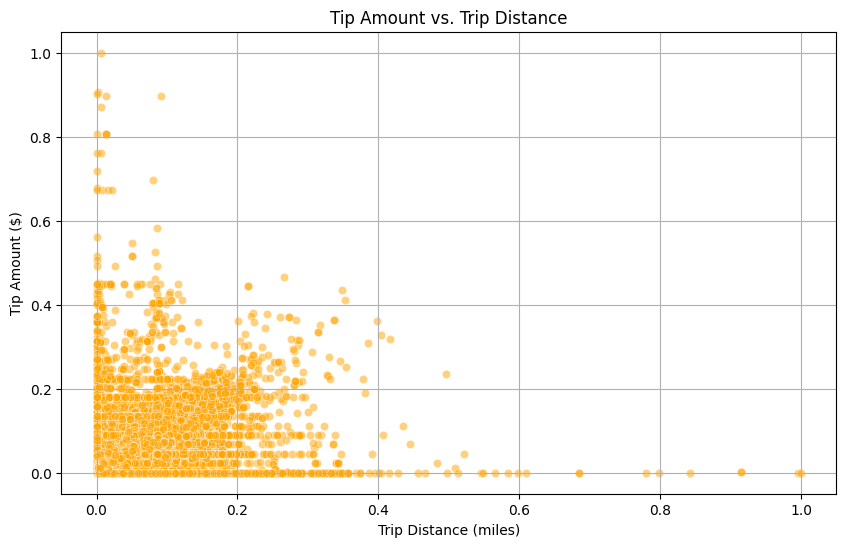

Correlation between trip distance and tip amount: 0.57


In [50]:
# Show relationship between tip and trip distance
plt.figure(figsize=(10, 6))
sns.scatterplot(x='trip_distance', y='tip_amount', data=df, alpha=0.5,color='orange')  # Added alpha for better visibility
plt.title('Tip Amount vs. Trip Distance')
plt.xlabel('Trip Distance (miles)')
plt.ylabel('Tip Amount ($)')
plt.grid(True)
plt.show()

correlation = df['trip_distance'].corr(df['tip_amount'])
print(f"Correlation between trip distance and tip amount: {correlation:.2f}")


**3.1.8** <font color = red>[3 marks]</font> <br>
Analyse the distribution of different payment types (`payment_type`)

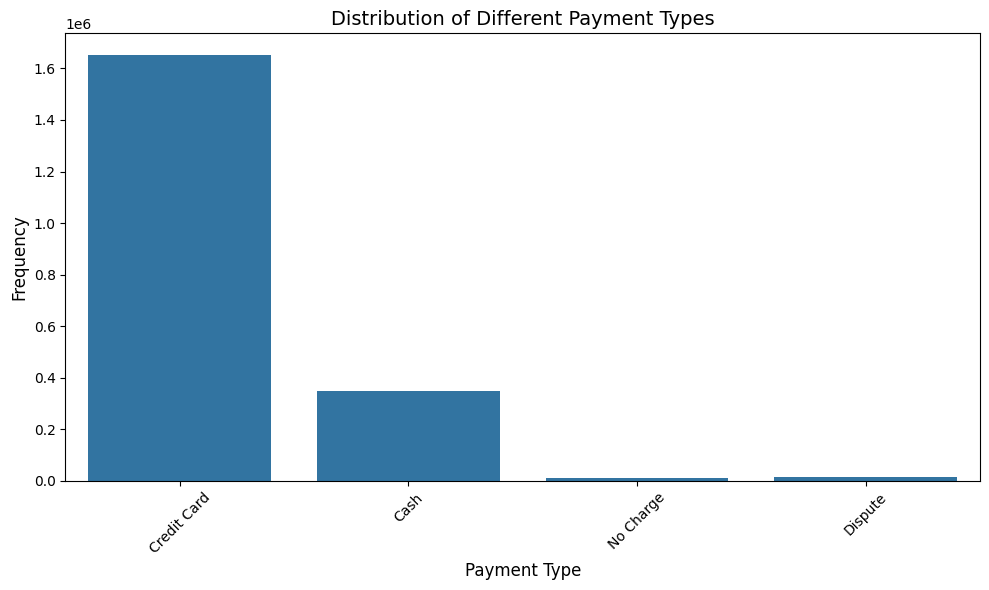

payment_type
1    81.49
2    17.27
3     0.49
4     0.75
Name: count, dtype: float64


In [51]:
# Analyse the distribution of different payment types (payment_type).

all_payment_types = [1, 2, 3, 4, 5, 6]
payment_type_labels = ['Credit Card', 'Cash', 'No Charge', 'Dispute', 'Unknown', 'Voided Trip']
payment_type_counts = df['payment_type'].value_counts().reindex(all_payment_types, fill_value=0)
payment_df = pd.DataFrame({
    'Type': payment_type_labels,
    'Count': payment_type_counts.values
})
payment_df = payment_df[payment_df['Count'] > 0]
plt.figure(figsize=(10, 6))
sns.barplot(data=payment_df, x='Type', y='Count')
plt.title('Distribution of Different Payment Types', fontsize=14)
plt.xlabel('Payment Type', fontsize=12)
plt.ylabel('Frequency', fontsize=12)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

payment_type_percentage = (payment_type_counts / payment_type_counts.sum()) * 100
non_zero_percentages = payment_type_percentage[payment_type_percentage > 0]
print(non_zero_percentages.round(2))


- 1= Credit card
- 2= Cash
- 3= No charge
- 4= Dispute



##### Geographical Analysis

For this, you have to use the *taxi_zones.shp* file from the *taxi_zones* folder.

There would be multiple files inside the folder (such as *.shx, .sbx, .sbn* etc). You do not need to import/read any of the files other than the shapefile, *taxi_zones.shp*.

Do not change any folder structure - all the files need to be present inside the folder for it to work.

The folder structure should look like this:
```
Taxi Zones
|- taxi_zones.shp.xml
|- taxi_zones.prj
|- taxi_zones.sbn
|- taxi_zones.shp
|- taxi_zones.dbf
|- taxi_zones.shx
|- taxi_zones.sbx

 ```

 You only need to read the `taxi_zones.shp` file. The *shp* file will utilise the other files by itself.

We will use the *GeoPandas* library for geopgraphical analysis
```
import geopandas as gpd
```

More about geopandas and shapefiles: [About](https://geopandas.org/en/stable/about.html)


Reading the shapefile is very similar to *Pandas*. Use `gpd.read_file()` function to load the data (*taxi_zones.shp*) as a GeoDataFrame. Documentation: [Reading and Writing Files](https://geopandas.org/en/stable/docs/user_guide/io.html)

In [52]:
!pip install geopandas

**3.1.9** <font color = red>[2 marks]</font> <br>
Load the shapefile and display it.

In [72]:
import geopandas as gpd

# Read the shapefile using geopandas
zones = gpd.read_file('/content/taxi_zones.shp') # read the .shp file using gpd
zones.head()

,OBJECTID,Shape_Leng,Shape_Area,zone,LocationID,borough,geometry
0,1,0.116357,0.000782,Newark Airport,1,EWR,"POLYGON ((933100.918 192536.086, 933091.011 19..."
1,2,0.433470,0.004866,Jamaica Bay,2,Queens,"MULTIPOLYGON (((1033269.244 172126.008, 103343..."
2,3,0.084341,0.000314,Allerton/Pelham Gardens,3,Bronx,"POLYGON ((1026308.77 256767.698, 1026495.593 2..."
3,4,0.043567,0.000112,Alphabet City,4,Manhattan,"POLYGON ((992073.467 203714.076, 992068.667 20..."
4,5,0.092146,0.000498,Arden Heights,5,Staten Island,"POLYGON ((935843.31 144283.336, 936046.565 144..."


Now, if you look at the DataFrame created, you will see columns like: `OBJECTID`,`Shape_Leng`, `Shape_Area`, `zone`, `LocationID`, `borough`, `geometry`.
<br><br>

Now, the `locationID` here is also what we are using to mark pickup and drop zones in the trip records.

The geometric parameters like shape length, shape area and geometry are used to plot the zones on a map.

This can be easily done using the `plot()` method.

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 263 entries, 0 to 262
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   OBJECTID    263 non-null    int32   
 1   Shape_Leng  263 non-null    float64 
 2   Shape_Area  263 non-null    float64 
 3   zone        263 non-null    object  
 4   LocationID  263 non-null    int32   
 5   borough     263 non-null    object  
 6   geometry    263 non-null    geometry
dtypes: float64(2), geometry(1), int32(2), object(2)
memory usage: 12.5+ KB
None


<Axes: >

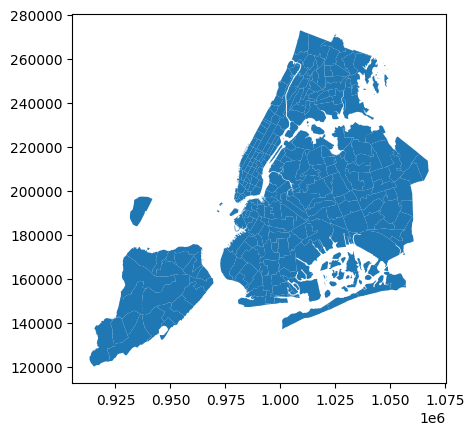

In [73]:
print(zones.info())
zones.plot()

Now, you have to merge the trip records and zones data using the location IDs.



**3.1.10** <font color = red>[3 marks]</font> <br>
Merge the zones data into trip data using the `locationID` and `PULocationID` columns.

In [74]:
# Merge zones and trip records using locationID and PULocationID

merged_df = pd.merge(df, zones, left_on='PULocationID', right_on='LocationID', how='left')

# Display the merged DataFrame
merged_df.head()


,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,...,pickup_month,pickup_quarter,trip_duration,OBJECTID,Shape_Leng,Shape_Area,zone,LocationID,borough,geometry
0,2,2023-01-01 00:07:18,2023-01-01 00:23:15,1.0,0.037782,1.0,N,138,256,2,...,January,2023Q1,15.950000,138.0,0.107467,0.000537,LaGuardia Airport,138.0,Queens,"MULTIPOLYGON (((1019904.219 225677.983, 102031..."
1,2,2023-01-01 00:16:41,2023-01-01 00:21:46,2.0,0.006053,1.0,N,161,237,1,...,January,2023Q1,5.083333,161.0,0.035804,0.000072,Midtown Center,161.0,Manhattan,"POLYGON ((991081.026 214453.698, 990952.644 21..."
2,2,2023-01-01 00:14:03,2023-01-01 00:24:36,3.0,0.007029,1.0,N,237,141,2,...,January,2023Q1,10.550000,237.0,0.042213,0.000096,Upper East Side South,237.0,Manhattan,"POLYGON ((993633.442 216961.016, 993507.232 21..."
3,2,2023-01-01 00:24:30,2023-01-01 00:29:55,1.0,0.002636,1.0,N,143,142,2,...,January,2023Q1,5.416667,143.0,0.054180,0.000151,Lincoln Square West,143.0,Manhattan,"POLYGON ((989338.1 223572.253, 989368.225 2235..."
4,1,2023-01-01 00:42:56,2023-01-01 01:16:33,2.0,0.034658,1.0,N,246,37,1,...,January,2023Q1,33.616667,246.0,0.069467,0.000281,West Chelsea/Hudson Yards,246.0,Manhattan,"POLYGON ((983031.177 217138.506, 983640.32 216..."


**3.1.11** <font color = red>[3 marks]</font> <br>
Group data by location IDs to find the total number of trips per location ID

In [75]:
# Group data by location and calculate the number of trips

# Group data by pickup location (PULocationID) and count trips
trip_counts = df.groupby('PULocationID').size().reset_index(name='num_trips')

# Display the result
trip_counts.head()  # Show the first few rows

,PULocationID,num_trips
0,1,240
1,2,2
2,3,46
3,4,2046
4,5,16


**3.1.12** <font color = red>[2 marks]</font> <br>
Now, use the grouped data to add number of trips to the GeoDataFrame.

We will use this to plot a map of zones showing total trips per zone.

In [76]:
# Merge trip counts back to the zones GeoDataFrame

zones_with_trips = pd.merge(zones, trip_counts, left_on='LocationID', right_on='PULocationID', how='left')

# Display the merged GeoDataFrame
zones_with_trips.head()

,OBJECTID,Shape_Leng,Shape_Area,zone,LocationID,borough,geometry,PULocationID,num_trips
0,1,0.116357,0.000782,Newark Airport,1,EWR,"POLYGON ((933100.918 192536.086, 933091.011 19...",1.0,240.0
1,2,0.433470,0.004866,Jamaica Bay,2,Queens,"MULTIPOLYGON (((1033269.244 172126.008, 103343...",2.0,2.0
2,3,0.084341,0.000314,Allerton/Pelham Gardens,3,Bronx,"POLYGON ((1026308.77 256767.698, 1026495.593 2...",3.0,46.0
3,4,0.043567,0.000112,Alphabet City,4,Manhattan,"POLYGON ((992073.467 203714.076, 992068.667 20...",4.0,2046.0
4,5,0.092146,0.000498,Arden Heights,5,Staten Island,"POLYGON ((935843.31 144283.336, 936046.565 144...",5.0,16.0


The next step is creating a color map (choropleth map) showing zones by the number of trips taken.

Again, you can use the `zones.plot()` method for this. [Plot Method GPD](https://geopandas.org/en/stable/docs/reference/api/geopandas.GeoDataFrame.plot.html#geopandas.GeoDataFrame.plot)

But first, you need to define the figure and axis for the plot.

`fig, ax = plt.subplots(1, 1, figsize = (12, 10))`

This function creates a figure (fig) and a single subplot (ax)

---

After setting up the figure and axis, we can proceed to plot the GeoDataFrame on this axis. This is done in the next step where we use the plot method of the GeoDataFrame.

You can define the following parameters in the `zones.plot()` method:
```
column = '',
ax = ax,
legend = True,
legend_kwds = {'label': "label", 'orientation': "<horizontal/vertical>"}
```

To display the plot, use `plt.show()`.

**3.1.13** <font color = red>[3 marks]</font> <br>
Plot a color-coded map showing zone-wise trips

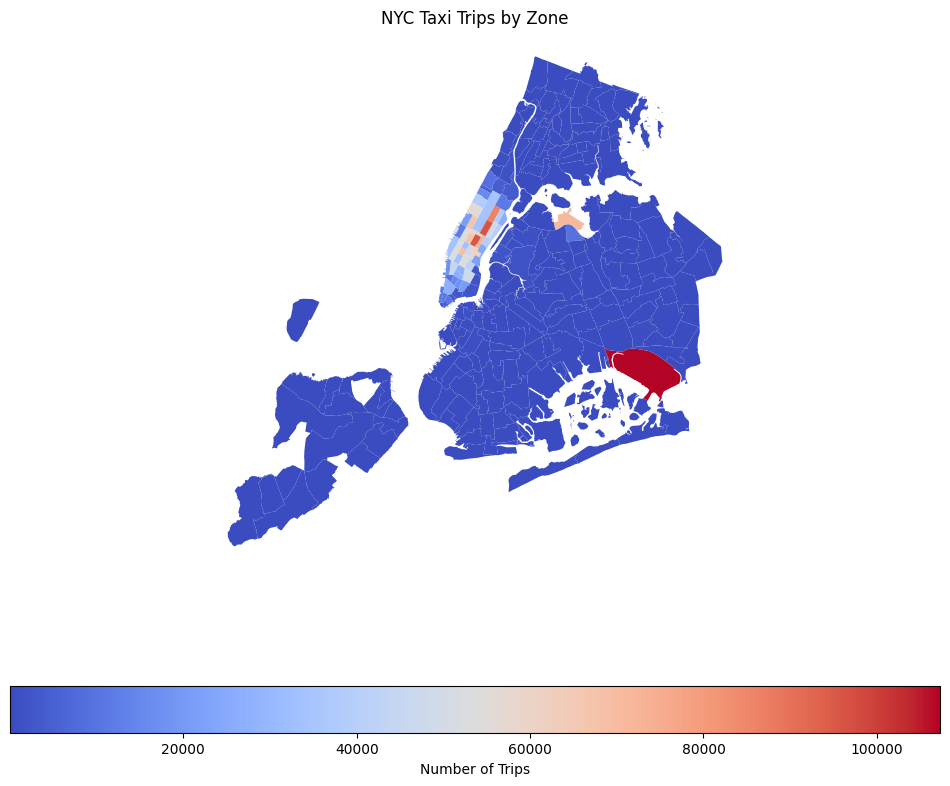

In [77]:
# Define figure and axis
fig, ax = plt.subplots(1, 1, figsize=(12, 10))
zones_with_trips.plot(
    column='num_trips',
    ax=ax,
    legend=True,
    legend_kwds={
        'label': "Number of Trips",
        'orientation': "horizontal"
    },
    cmap='coolwarm'
)

ax.set_title("NYC Taxi Trips by Zone")
plt.axis('off')
plt.show()

In [78]:
# can you try displaying the zones DF sorted by the number of trips?
zones_with_trips_sorted = zones_with_trips.sort_values(by='num_trips', ascending=False)
zones_with_trips_sorted.head()


,OBJECTID,Shape_Leng,Shape_Area,zone,LocationID,borough,geometry,PULocationID,num_trips
131,132,0.245479,0.002038,JFK Airport,132,Queens,"MULTIPOLYGON (((1032791.001 181085.006, 103283...",132.0,107283.0
236,237,0.042213,0.000096,Upper East Side South,237,Manhattan,"POLYGON ((993633.442 216961.016, 993507.232 21...",237.0,96291.0
160,161,0.035804,0.000072,Midtown Center,161,Manhattan,"POLYGON ((991081.026 214453.698, 990952.644 21...",161.0,95198.0
235,236,0.044252,0.000103,Upper East Side North,236,Manhattan,"POLYGON ((995940.048 221122.92, 995812.322 220...",236.0,86008.0
161,162,0.035270,0.000048,Midtown East,162,Manhattan,"POLYGON ((992224.354 214415.293, 992096.999 21...",162.0,72762.0


Here we have completed the temporal, financial and geographical analysis on the trip records.

**Compile your findings from general analysis below:**

You can consider the following points:

* Busiest hours, days and months
* Trends in revenue collected
* Trends in quarterly revenue
* How fare depends on trip distance, trip duration and passenger counts
* How tip amount depends on trip distance
* Busiest zones


#### **3.2** Detailed EDA: Insights and Strategies
<font color = red>[50 marks]</font> <br>

Having performed basic analyses for finding trends and patterns, we will now move on to some detailed analysis focussed on operational efficiency, pricing strategies, and customer experience.

##### Operational Efficiency

Analyze variations by time of day and location to identify bottlenecks or inefficiencies in routes

**3.2.1** <font color = red>[3 marks]</font> <br>
Identify slow routes by calculating the average time taken by cabs to get from one zone to another at different hours of the day.

Speed on a route *X* for hour *Y* = (*distance of the route X / average trip duration for hour Y*)

In [79]:
## Find routes which have the slowest speeds at different times of the day
df_route = df[['PULocationID', 'DOLocationID', 'trip_distance', 'tpep_pickup_datetime', 'tpep_dropoff_datetime']].copy()
df_route['trip_duration_hrs'] = (df_route['tpep_dropoff_datetime'] - df_route['tpep_pickup_datetime']).dt.total_seconds() / 3600
df_route = df_route[(df_route['trip_duration_hrs'] > 0) & (df_route['trip_distance'] > 0)]
df_route['pickup_hour'] = df_route['tpep_pickup_datetime'].dt.hour
grouped = df_route.groupby(['PULocationID', 'DOLocationID', 'pickup_hour'])
speed_data = grouped.agg({
    'trip_distance': 'mean',
    'trip_duration_hrs': 'mean'
}).reset_index()
speed_data['avg_speed_mph'] = speed_data['trip_distance'] / speed_data['trip_duration_hrs']
slowest_routes = speed_data.sort_values(by='avg_speed_mph').head(10)
print(slowest_routes[['PULocationID', 'DOLocationID', 'pickup_hour', 'avg_speed_mph']])

        PULocationID  DOLocationID  pickup_hour  avg_speed_mph
102294           232            65           13       0.000026
114929           243           264           17       0.000038
61252            142           142            5       0.000116
120428           258           258            1       0.000128
33393            100             7            8       0.000193
6451              40            65           21       0.000229
39490            113           235           22       0.000235
89226            194           194           16       0.000239
95261            226           145           18       0.000253
9705              45            45           10       0.000290


How does identifying high-traffic, high-demand routes help us?

**3.2.2** <font color = red>[3 marks]</font> <br>
Calculate the number of trips at each hour of the day and visualise them. Find the busiest hour and show the number of trips for that hour.

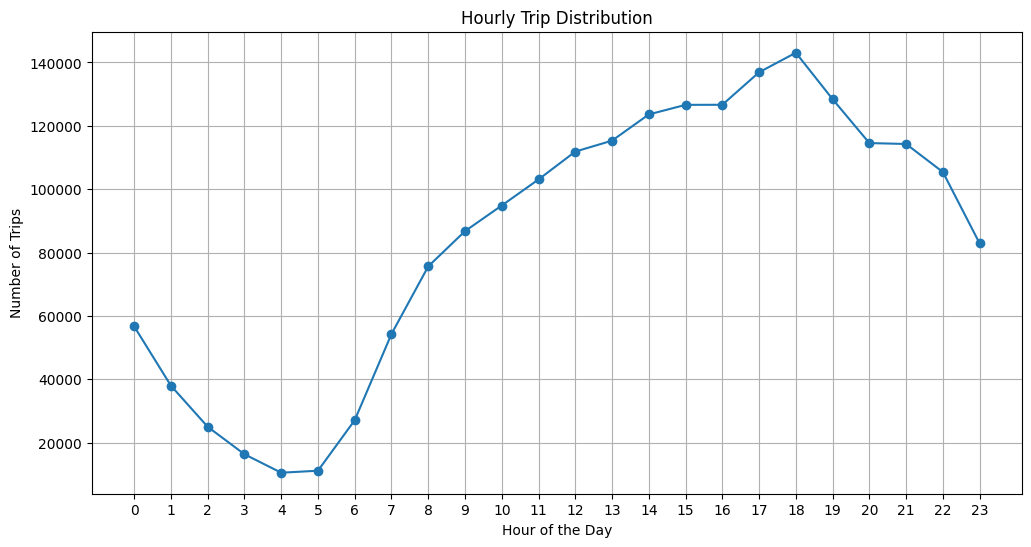

Busiest hour: 18
Number of trips during busiest hour: 143082


In [80]:
 # Visualise the number of trips per hour and find the busiest hour
df['pickup_hour'] = df['tpep_pickup_datetime'].dt.hour
hourly_trips = df.groupby('pickup_hour')['tpep_pickup_datetime'].count().reset_index(name='trip_count')
busiest_hour = hourly_trips.loc[hourly_trips['trip_count'].idxmax()]

plt.figure(figsize=(12, 6))
plt.plot(hourly_trips['pickup_hour'], hourly_trips['trip_count'], marker='o')
plt.title('Hourly Trip Distribution')
plt.xlabel('Hour of the Day')
plt.ylabel('Number of Trips')
plt.xticks(range(24))
plt.grid(True)
plt.show()
print(f"Busiest hour: {busiest_hour['pickup_hour']}")
print(f"Number of trips during busiest hour: {busiest_hour['trip_count']}")


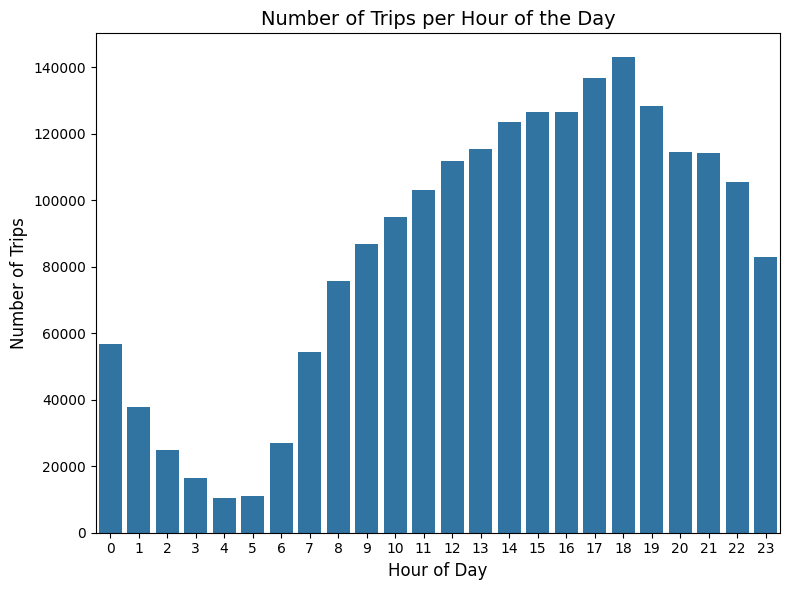

In [81]:
# Extract the hour from pickup datetime
df['pickup_hour'] = df['tpep_pickup_datetime'].dt.hour
trip_counts = df['pickup_hour'].value_counts().sort_index()

plt.figure(figsize=(8, 6))
sns.barplot(x=trip_counts.index, y=trip_counts.values)
plt.title('Number of Trips per Hour of the Day', fontsize=14)
plt.xlabel('Hour of Day', fontsize=12)
plt.ylabel('Number of Trips', fontsize=12)
plt.xticks(range(0, 24))
plt.tight_layout()
plt.show()

Remember, we took a fraction of trips. To find the actual number, you have to scale the number up by the sampling ratio.

**3.2.3** <font color = red>[2 mark]</font> <br>
Find the actual number of trips in the five busiest hours

In [82]:
# Scale up the number of trips

# Fill in the value of your sampling fraction and use that to scale up the numbers
sample_fraction = 0.1

top5_hours = trip_counts.sort_values(ascending=False).head(5)
scaled_top5 = (top5_hours / sample_fraction).astype(int)
top5_hours

,count
pickup_hour,
18,143082
17,136912
19,128420
16,126649
15,126624


**3.2.4** <font color = red>[3 marks]</font> <br>
Compare hourly traffic pattern on weekdays. Also compare for weekend.

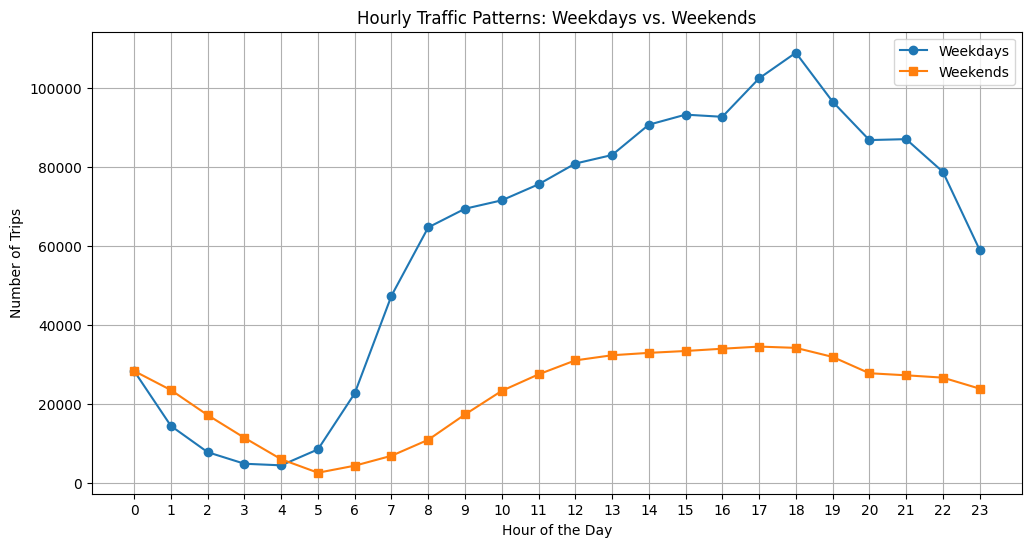

In [83]:
# Compare traffic trends for the week days and weekends

df['day_of_week'] = df['tpep_pickup_datetime'].dt.dayofweek  # Monday=0, Sunday=6
weekdays_df = df[df['day_of_week'] < 5]  # Monday to Friday
weekends_df = df[df['day_of_week'] >= 5]  # Saturday and Sunday
weekday_hourly_counts = weekdays_df.groupby(weekdays_df['tpep_pickup_datetime'].dt.hour)['tpep_pickup_datetime'].count()
weekend_hourly_counts = weekends_df.groupby(weekends_df['tpep_pickup_datetime'].dt.hour)['tpep_pickup_datetime'].count()

plt.figure(figsize=(12, 6))
plt.plot(weekday_hourly_counts.index, weekday_hourly_counts.values, label='Weekdays', marker='o')
plt.plot(weekend_hourly_counts.index, weekend_hourly_counts.values, label='Weekends', marker='s')
plt.title('Hourly Traffic Patterns: Weekdays vs. Weekends')
plt.xlabel('Hour of the Day')
plt.ylabel('Number of Trips')
plt.xticks(range(24))
plt.legend()
plt.grid(True)
plt.show()

What can you infer from the above patterns? How will finding busy and quiet hours for each day help us?

**3.2.5** <font color = red>[3 marks]</font> <br>
Identify top 10 zones with high hourly pickups. Do the same for hourly dropoffs. Show pickup and dropoff trends in these zones.

In [84]:
# Find top 10 pickup and dropoff zones
# Count pickups by location ID
top_pu = df['PULocationID'].value_counts().head(10).reset_index()
top_pu.columns = ['LocationID', 'Pickup_Trips']

# Merge with zones to get zone names
top_pu = top_pu.merge(zones[['LocationID', 'zone']], on='LocationID', how='left')
print("Top 10 Pickup Zones:")
top_pu

Top 10 Pickup Zones:


,LocationID,Pickup_Trips,zone
0,132,107283,JFK Airport
1,237,96291,Upper East Side South
2,161,95198,Midtown Center
3,236,86008,Upper East Side North
4,162,72762,Midtown East
5,138,71061,LaGuardia Airport
6,186,70284,Penn Station/Madison Sq West
7,230,67840,Times Sq/Theatre District
8,142,67405,Lincoln Square East
9,170,60441,Murray Hill


In [85]:
# Count dropoffs by location ID
top_do = df['DOLocationID'].value_counts().head(10).reset_index()
top_do.columns = ['LocationID', 'Dropoff_Trips']

# Merge with zones to get zone names
top_do = top_do.merge(zones[['LocationID', 'zone']], on='LocationID', how='left')
print("Top 10 Dropoff Zones:")
top_do

Top 10 Dropoff Zones:


,LocationID,Dropoff_Trips,zone
0,236,90088,Upper East Side North
1,237,85827,Upper East Side South
2,161,79365,Midtown Center
3,230,62594,Times Sq/Theatre District
4,170,60093,Murray Hill
5,162,57776,Midtown East
6,142,57003,Lincoln Square East
7,239,56709,Upper West Side South
8,141,53774,Lenox Hill West
9,68,51363,East Chelsea


**3.2.6** <font color = red>[3 marks]</font> <br>
Find the ratio of pickups and dropoffs in each zone. Display the 10 highest (pickup/drop) and 10 lowest (pickup/drop) ratios.

In [86]:

# Find the top 10 and bottom 10 pickup/dropoff ratios
pickup_counts = df['PULocationID'].value_counts().rename('pickup_count')
dropoff_counts = df['DOLocationID'].value_counts().rename('dropoff_count')

ratios = pd.concat([pickup_counts, dropoff_counts], axis=1).fillna(0)
ratios['pickup_dropoff_ratio'] = ratios['pickup_count'] / ratios['dropoff_count'].replace(0, np.nan)
ratios = ratios.reset_index().rename(columns={'index': 'LocationID'})
ratios = ratios.merge(zones[['LocationID', 'zone']], on='LocationID', how='left')
ratios = ratios.set_index('zone')
pickup_dropoff_ratios = ratios['pickup_dropoff_ratio']
top_pickup_dropoff_ratio = pickup_dropoff_ratios.sort_values(ascending=False).head(10)
bottom_pickup_dropoff_ratio = pickup_dropoff_ratios.sort_values().head(10)


In [87]:
bottom_pickup_dropoff_ratio

,pickup_dropoff_ratio
zone,
Freshkills Park,0.000000
Oakwood,0.000000
Broad Channel,0.000000
West Brighton,0.000000
Breezy Point/Fort Tilden/Riis Beach,0.025000
Stapleton,0.029412
Windsor Terrace,0.035928
Newark Airport,0.040761
Grymes Hill/Clifton,0.043478


In [88]:
top_pickup_dropoff_ratio

,pickup_dropoff_ratio
zone,
East Elmhurst,8.391344
JFK Airport,4.605607
LaGuardia Airport,2.886664
Penn Station/Madison Sq West,1.581655
Greenwich Village South,1.381551
Central Park,1.374642
West Village,1.328087
Midtown East,1.259381
Midtown Center,1.199496


**3.2.7** <font color = red>[3 marks]</font> <br>
Identify zones with high pickup and dropoff traffic during night hours (11PM to 5AM)

In [89]:
# During night hours (11pm to 5am) find the top 10 pickup and dropoff zones
# Note that the top zones should be of night hours and not the overall top zones


night_df = df[(df['tpep_pickup_datetime'].dt.hour >= 23) | (df['tpep_pickup_datetime'].dt.hour < 5)]
night_df = night_df.merge(
    zones[['LocationID', 'zone']].rename(columns={'zone': 'pickup_zone'}),
    left_on='PULocationID',
    right_on='LocationID',
    how='left'
)
night_df = night_df.merge(
    zones[['LocationID', 'zone']].rename(columns={'zone': 'dropoff_zone'}),
    left_on='DOLocationID',
    right_on='LocationID',
    how='left'
)
top_night_pickups = night_df.groupby('pickup_zone')['PULocationID'].count().sort_values(ascending=False).head(10)
top_night_dropoffs = night_df.groupby('dropoff_zone')['DOLocationID'].count().sort_values(ascending=False).head(10)

In [92]:
top_night_pickups

,PULocationID
pickup_zone,
East Village,16971
JFK Airport,14801
West Village,13674
Clinton East,10825
Lower East Side,10619
Greenwich Village South,9692
Times Sq/Theatre District,8646
Penn Station/Madison Sq West,6892
Midtown South,6598


In [91]:

top_night_dropoffs

,DOLocationID
dropoff_zone,
East Village,9158
Clinton East,7326
Murray Hill,6747
Gramercy,6240
East Chelsea,6124
Lenox Hill West,5683
West Village,5429
Yorkville West,5395
Lower East Side,4837


Now, let us find the revenue share for the night time hours and the day time hours. After this, we will move to deciding a pricing strategy.

**3.2.8** <font color = red>[2 marks]</font> <br>
Find the revenue share for nighttime and daytime hours.

In [93]:
# Filter for night hours (11 PM to 5 AM)

df['pickup_hour'] = df['tpep_pickup_datetime'].dt.hour

nighttime_df = df[(df['pickup_hour'] >= 23) | (df['pickup_hour'] <= 5)]  # 11 PM - 5 AM
daytime_df = df[(df['pickup_hour'] >= 6) & (df['pickup_hour'] <= 22)]  # 6 AM - 10 PM

nighttime_revenue = nighttime_df['total_amount'].sum()
daytime_revenue = daytime_df['total_amount'].sum()

total_revenue = df['total_amount'].sum()

nighttime_revenue_share = (nighttime_revenue / total_revenue) * 100
daytime_revenue_share = (daytime_revenue / total_revenue) * 100

print(f"Nighttime Revenue Share: {nighttime_revenue_share:.2f}%")
print(f"Daytime Revenue Share: {daytime_revenue_share:.2f}%")

Nighttime Revenue Share: 12.07%
Daytime Revenue Share: 87.93%


##### Pricing Strategy

**3.2.9** <font color = red>[2 marks]</font> <br>
For the different passenger counts, find the average fare per mile per passenger.

For instance, suppose the average fare per mile for trips with 3 passengers is 3 USD/mile, then the fare per mile per passenger will be 1 USD/mile.

In [94]:
# Analyse the fare per mile per passenger for different passenger counts
valid_fares = df[(df['trip_distance'] > 0) & (df['passenger_count'] > 0)]
valid_fares['fare_per_mile_per_passenger'] = valid_fares['total_amount'] / (valid_fares['trip_distance'] * valid_fares['passenger_count'])
avg_fare_by_passenger = valid_fares.groupby('passenger_count')['fare_per_mile_per_passenger'].mean()
avg_fare_by_passenger


,fare_per_mile_per_passenger
passenger_count,
1.0,0.024209
2.0,0.013439
3.0,0.008533
4.0,0.008423
5.0,0.003931
6.0,0.003197


**3.2.10** <font color = red>[3 marks]</font> <br>
Find the average fare per mile by hours of the day and by days of the week

In [95]:
# Compare the average fare per mile for different days and for different times of the day

valid_df = df[(df['trip_distance'] > 0) & (df['total_amount'] > 0)]

valid_df['day_of_week'] = valid_df['tpep_pickup_datetime'].dt.day_name()
valid_df['hour_of_day'] = valid_df['tpep_pickup_datetime'].dt.hour

valid_df['fare_per_mile'] = valid_df['total_amount'] / valid_df['trip_distance']

fare_by_day = valid_df.groupby('day_of_week')['fare_per_mile'].mean().round(2)

fare_by_hour = valid_df.groupby('hour_of_day')['fare_per_mile'].mean().round(2)

ordered_days = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
fare_by_day = fare_by_day.reindex(ordered_days)

In [96]:
fare_by_day

,fare_per_mile
day_of_week,
Monday,0.02
Tuesday,0.03
Wednesday,0.02
Thursday,0.02
Friday,0.02
Saturday,0.02
Sunday,0.03


In [97]:
fare_by_hour

,fare_per_mile
hour_of_day,
0,0.02
1,0.02
2,0.02
3,0.02
4,0.03
5,0.03
6,0.02
7,0.02
8,0.02


**3.2.11** <font color = red>[3 marks]</font> <br>
Analyse the average fare per mile for the different vendors for different hours of the day

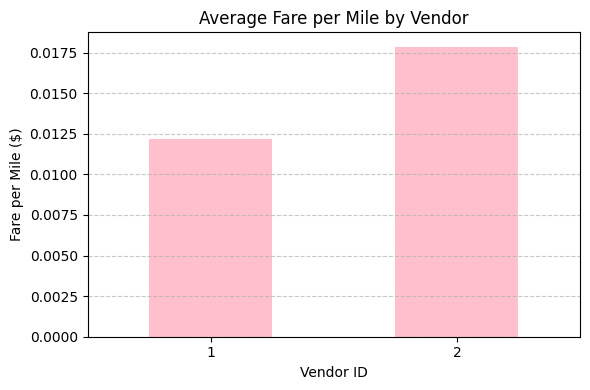

In [99]:
# Compare fare per mile for different vendors
df_vendor = df[df['trip_distance'] > 0].copy()

df_vendor['fare_per_mile'] = df_vendor['fare_amount'] / df_vendor['trip_distance']

vendor_fare_comparison = df_vendor.groupby('VendorID')['fare_per_mile'].mean().sort_values()

vendor_fare_comparison.plot(kind='bar', color='pink', figsize=(6, 4))
plt.title('Average Fare per Mile by Vendor')
plt.xlabel('Vendor ID')
plt.ylabel('Fare per Mile ($)')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()


**3.2.12** <font color = red>[5 marks]</font> <br>
Compare the fare rates of the different vendors in a tiered fashion. Analyse the average fare per mile for distances upto 2 miles. Analyse the fare per mile for distances from 2 to 5 miles. And then for distances more than 5 miles.


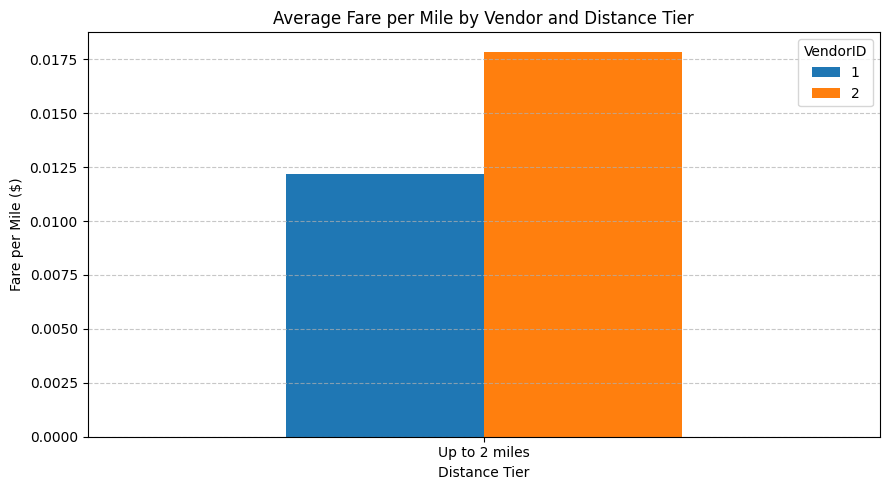

In [100]:
# Defining distance tiers
df['fare_per_mile'] = df['fare_amount'] / df['trip_distance']
df = df[df['trip_distance'] > 0]  # Avoid division by zero

tier1 = df[df['trip_distance'] <= 2].copy()
tier2 = df[(df['trip_distance'] > 2) & (df['trip_distance'] <= 5)].copy()
tier3 = df[df['trip_distance'] > 5].copy()

tier1['distance_tier'] = 'Up to 2 miles'
tier2['distance_tier'] = '2 to 5 miles'
tier3['distance_tier'] = 'More than 5 miles'

tiered_data = pd.concat([tier1, tier2, tier3])

avg_fare_by_tier = tiered_data.groupby(['distance_tier', 'VendorID'])['fare_per_mile'].mean().unstack()

avg_fare_by_tier.plot(kind='bar', figsize=(9, 5))
plt.title('Average Fare per Mile by Vendor and Distance Tier')
plt.xlabel('Distance Tier')
plt.ylabel('Fare per Mile ($)')
plt.xticks(rotation=0)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


##### Customer Experience and Other Factors

**3.2.13** <font color = red>[5 marks]</font> <br>
Analyse average tip percentages based on trip distances, passenger counts and time of pickup. What factors lead to low tip percentages?

In [ ]:
#  Analyze tip percentages based on distances, passenger counts and pickup times



In [101]:
#  Analyze tip percentages based on distances, passenger counts and pickup times

df['tip_percentage'] = (df['tip_amount'] / (df['total_amount'] + 1e-6)) * 100  # Avoid division by zero

tips_df = df[['trip_distance', 'passenger_count', 'total_amount', 'tip_amount', 'pickup_hour', 'tip_percentage']].copy()

tips_df['hour'] = tips_df['pickup_hour']

tips_df['distance_category'] = pd.cut(
    tips_df['trip_distance'], [0, 2, 5, float('inf')],
    labels=['Up to 2 miles', '2 to 5 miles', 'More than 5 miles']
)

tips_df['passenger_category'] = pd.cut(
    tips_df['passenger_count'], [0, 1, 3, float('inf')],
    labels=['1 passenger', '2-3 passengers', '4+ passengers']
)

tips_df['time_category'] = pd.cut(
    tips_df['hour'], [0, 6, 12, 18, 24],
    labels=['Midnight to 6 AM', '6 AM to Noon', 'Noon to 6 PM', '6 PM to Midnight'],
    right=False
)

print("Average Tip Percentage by Distance:")
print(tips_df.groupby('distance_category')['tip_percentage'].mean())

print("\nAverage Tip Percentage by Passenger Count:")
print(tips_df.groupby('passenger_category')['tip_percentage'].mean())

print("\nAverage Tip Percentage by Time of Pickup:")
print(tips_df.groupby('time_category')['tip_percentage'].mean())

low_tip_factors = tips_df[tips_df['tip_percentage'] < 10]
print("\nMost Common Low Tip Scenarios:")
print(low_tip_factors.groupby(['distance_category', 'passenger_category', 'time_category'])
                     .size()
                     .sort_values(ascending=False)
                     .head(10))
distance_bins = [0, 1, 2, 5, 10, 20, 50]
tips_df['distance_bin'] = pd.cut(tips_df['trip_distance'], bins=distance_bins)

tip_by_distance = tips_df.groupby('distance_bin')['tip_percentage'].mean()

Average Tip Percentage by Distance:
distance_category
Up to 2 miles        7675.959104
2 to 5 miles                 NaN
More than 5 miles            NaN
Name: tip_percentage, dtype: float64

Average Tip Percentage by Passenger Count:
passenger_category
1 passenger       7760.709235
2-3 passengers    7466.462552
4+ passengers     7236.358135
Name: tip_percentage, dtype: float64

Average Tip Percentage by Time of Pickup:
time_category
Midnight to 6 AM    7432.833307
6 AM to Noon        7582.765065
Noon to 6 PM        7562.611999
6 PM to Midnight    7912.223255
Name: tip_percentage, dtype: float64

Most Common Low Tip Scenarios:
distance_category  passenger_category  time_category   
Up to 2 miles      1 passenger         Noon to 6 PM        122002
                                       6 PM to Midnight     89511
                                       6 AM to Noon         77841
                   2-3 passengers      Noon to 6 PM         37718
                                       6 PM to

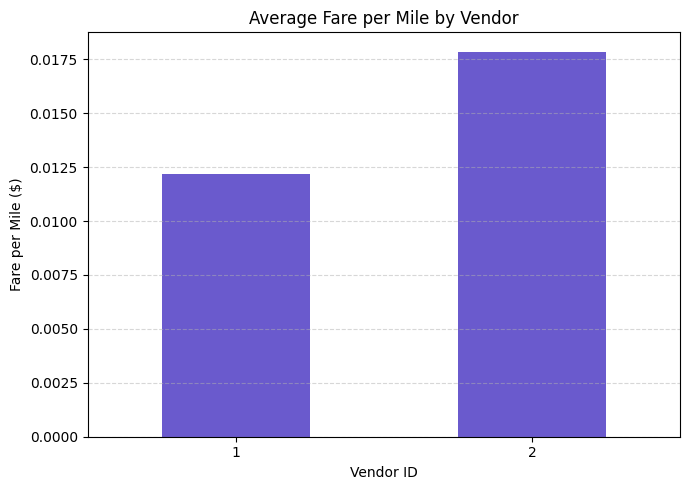

In [102]:

vendor_fare = df.groupby('VendorID')['fare_per_mile'].mean().sort_values()

vendor_fare.plot(kind='bar', color='slateblue', figsize=(7, 5))
plt.title('Average Fare per Mile by Vendor')
plt.xlabel('Vendor ID')
plt.ylabel('Fare per Mile ($)')
plt.xticks(rotation=0)
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()

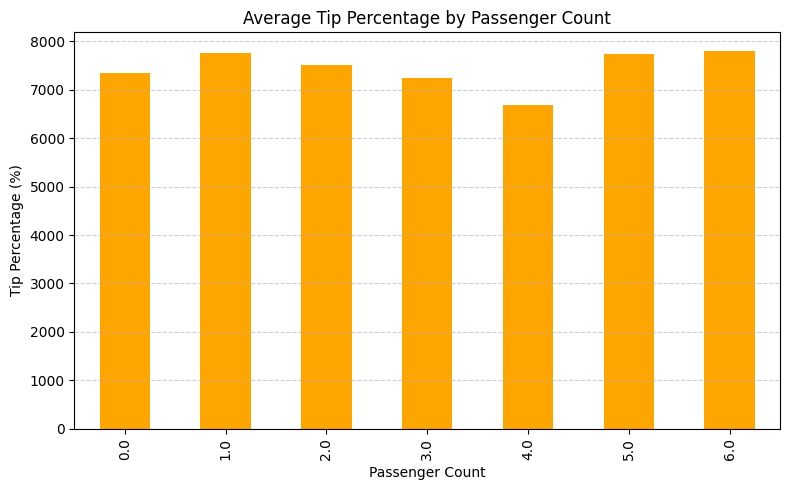

In [103]:
tip_by_passenger = df.groupby('passenger_count')['tip_percentage'].mean()

tip_by_passenger.plot(kind='bar', figsize=(8, 5), color='orange')
plt.title('Average Tip Percentage by Passenger Count')
plt.ylabel('Tip Percentage (%)')
plt.xlabel('Passenger Count')
plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()

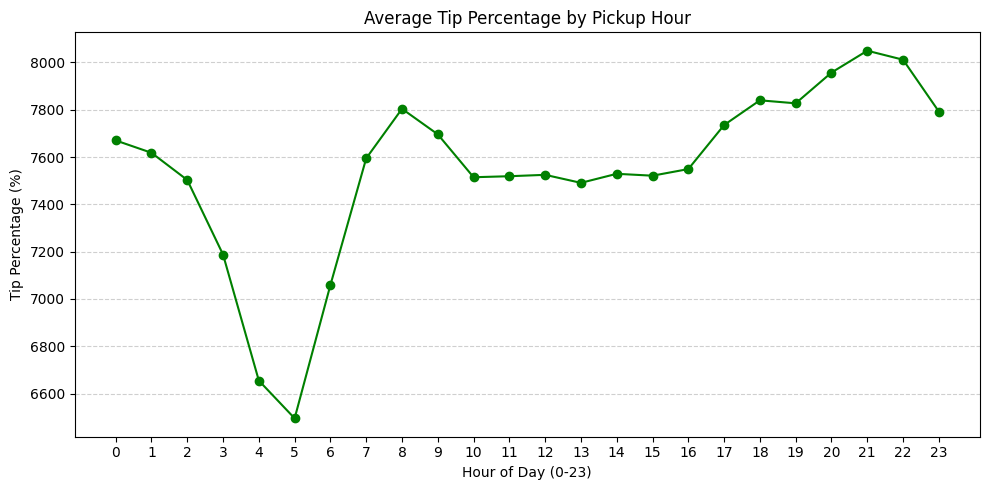

In [104]:
# Extract pickup hour
df['pickup_hour'] = df['tpep_pickup_datetime'].dt.hour

tip_by_hour = df.groupby('pickup_hour')['tip_percentage'].mean()

tip_by_hour.plot(kind='line', marker='o', figsize=(10, 5), color='green')
plt.title('Average Tip Percentage by Pickup Hour')
plt.xlabel('Hour of Day (0-23)')
plt.ylabel('Tip Percentage (%)')
plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.xticks(range(0, 24))
plt.tight_layout()
plt.show()

Additional analysis [optional]: Let's try comparing cases of low tips with cases of high tips to find out if we find a clear aspect that drives up the tipping behaviours

In [119]:
# Compare trips with tip percentage < 10% to trips with tip percentage > 25%
df['tip_percent'] = (df['tip_amount'] / (df['fare_amount'] + 1e-6)) * 100  # Avoid division by zero

low_tip = df[df['tip_percent'] < 10].copy()
high_tip = df[df['tip_percent'] > 25].copy()

comparison = pd.DataFrame({
    'Low Tip (<10%)': [
        low_tip['trip_distance'].mean(),
        low_tip['passenger_count'].mean(),
        low_tip['fare_amount'].mean(),
        low_tip['tip_amount'].mean()
    ],
    'High Tip (>25%)': [
        high_tip['trip_distance'].mean(),
        high_tip['passenger_count'].mean(),
        high_tip['fare_amount'].mean(),
        high_tip['tip_amount'].mean()
    ]
}, index=['Avg Trip Distance', 'Avg Passenger Count', 'Avg Fare Amount', 'Avg Tip Amount'])

print("Average Comparison Between Low and High Tip Trips:")
print(comparison.round(2))

Average Comparison Between Low and High Tip Trips:
                     Low Tip (<10%)  High Tip (>25%)
Avg Trip Distance              0.02             0.02
Avg Passenger Count            1.42             1.35
Avg Fare Amount                0.00             0.00
Avg Tip Amount                 0.00             0.02


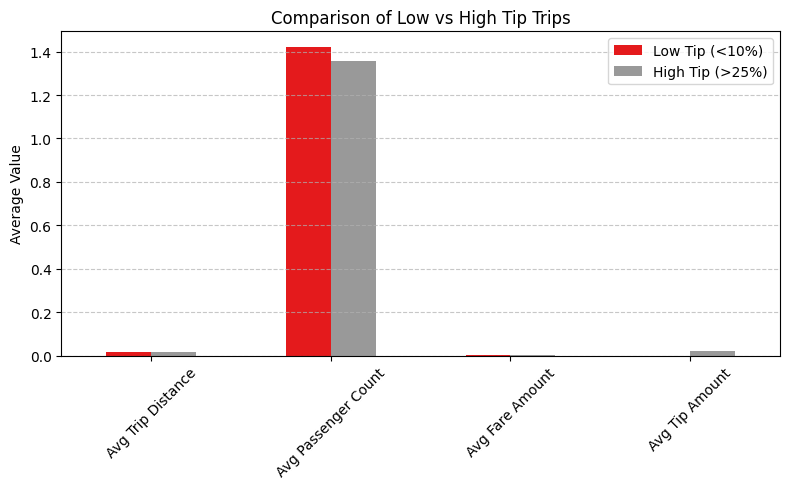

In [121]:
comparison.plot(kind='bar', figsize=(8, 5), colormap='Set1')
plt.title('Comparison of Low vs High Tip Trips')
plt.ylabel('Average Value')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

**3.2.14** <font color = red>[3 marks]</font> <br>
Analyse the variation of passenger count across hours and days of the week.

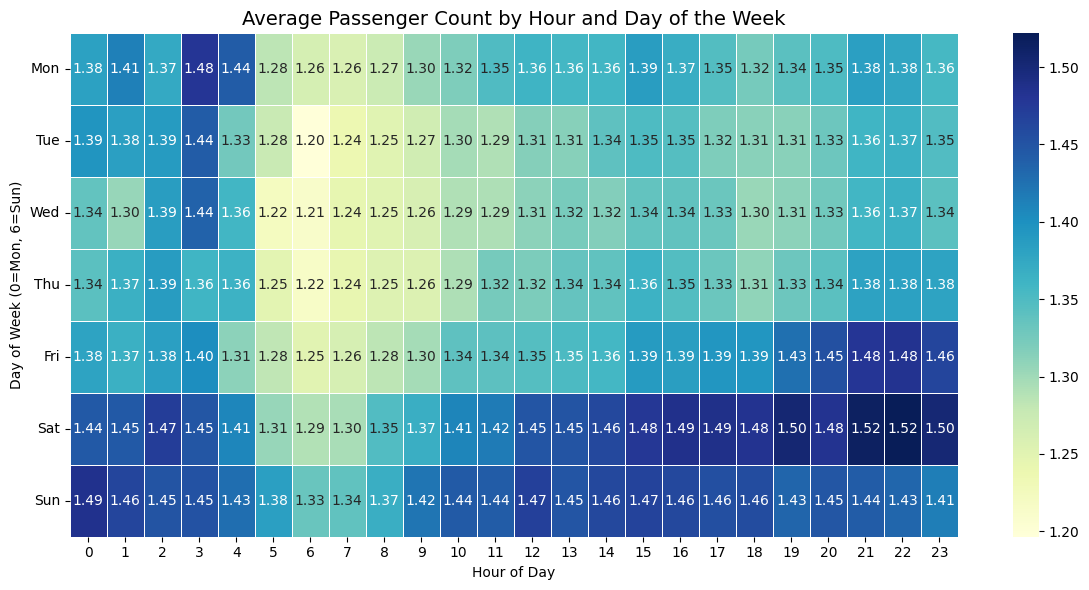

In [108]:
# See how passenger count varies across hours and days

df['pickup_hour'] = df['tpep_pickup_datetime'].dt.hour
df['pickup_dayofweek'] = df['tpep_pickup_datetime'].dt.dayofweek

passenger_variation = df.groupby(['pickup_dayofweek', 'pickup_hour'])['passenger_count'].mean().unstack()

plt.figure(figsize=(12, 6))
sns.heatmap(passenger_variation, cmap='YlGnBu', linewidths=0.5, annot=True, fmt=".2f")
plt.title('Average Passenger Count by Hour and Day of the Week', fontsize=14)
plt.xlabel('Hour of Day')
plt.ylabel('Day of Week (0=Mon, 6=Sun)')
plt.yticks(ticks=np.arange(7) + 0.5, labels=['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun'], rotation=0)
plt.tight_layout()
plt.show()

**3.2.15** <font color = red>[2 marks]</font> <br>
Analyse the variation of passenger counts across zones

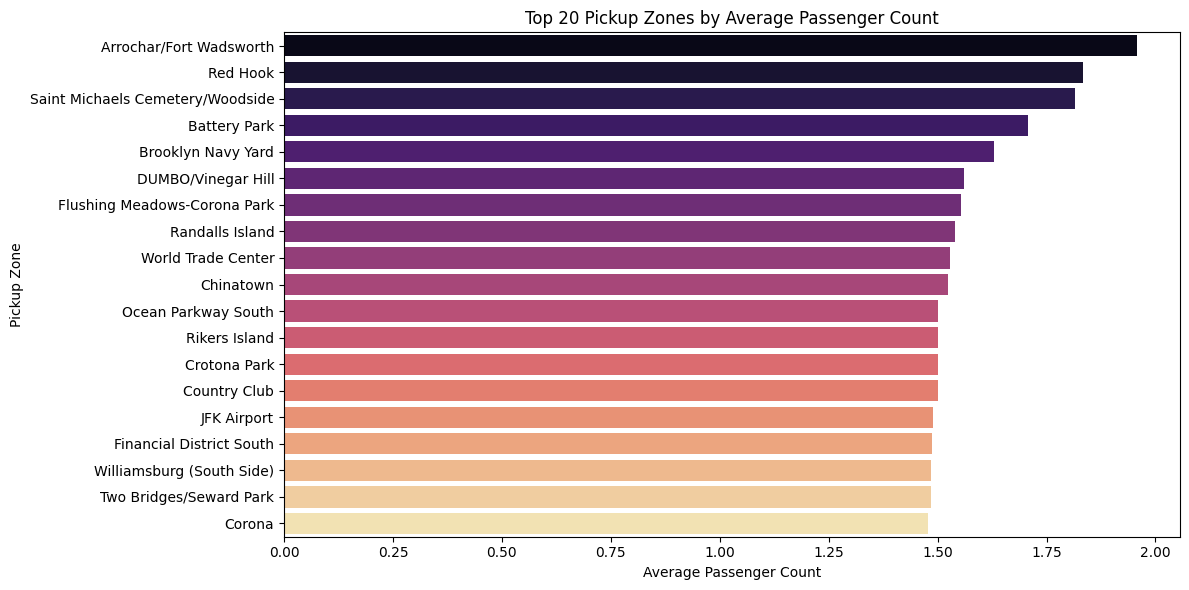

In [110]:
# How does passenger count vary across zones
zone_passenger_avg = df.groupby('PULocationID')['passenger_count'].mean().reset_index()

zone_passenger_avg = zone_passenger_avg.merge(zones[['LocationID', 'zone']], left_on='PULocationID', right_on='LocationID', how='left')

zone_passenger_avg = zone_passenger_avg.sort_values(by='passenger_count', ascending=False).head(20)

plt.figure(figsize=(12, 6))
sns.barplot(data=zone_passenger_avg, x='passenger_count', y='zone', palette='magma')
plt.title('Top 20 Pickup Zones by Average Passenger Count')
plt.xlabel('Average Passenger Count')
plt.ylabel('Pickup Zone')
plt.tight_layout()
plt.show()

In [111]:
# For a more detailed analysis, we can use the zones_with_trips GeoDataFrame
# Create a new column for the average passenger count in each zone.

avg_passenger_by_zone = df.groupby('PULocationID')['passenger_count'].mean().reset_index()
avg_passenger_by_zone.rename(columns={'passenger_count': 'avg_passenger_count'}, inplace=True)
zones_with_trips = zones_with_trips.merge(avg_passenger_by_zone, left_on='LocationID', right_on='PULocationID', how='left')
zones_with_trips.head()

,OBJECTID,Shape_Leng,Shape_Area,zone,LocationID,borough,geometry,PULocationID_x,num_trips,PULocationID_y,avg_passenger_count
0,1,0.116357,0.000782,Newark Airport,1,EWR,"POLYGON ((933100.918 192536.086, 933091.011 19...",1.0,240.0,1.0,1.360000
1,2,0.433470,0.004866,Jamaica Bay,2,Queens,"MULTIPOLYGON (((1033269.244 172126.008, 103343...",2.0,2.0,2.0,1.000000
2,3,0.084341,0.000314,Allerton/Pelham Gardens,3,Bronx,"POLYGON ((1026308.77 256767.698, 1026495.593 2...",3.0,46.0,3.0,1.000000
3,4,0.043567,0.000112,Alphabet City,4,Manhattan,"POLYGON ((992073.467 203714.076, 992068.667 20...",4.0,2046.0,4.0,1.417043
4,5,0.092146,0.000498,Arden Heights,5,Staten Island,"POLYGON ((935843.31 144283.336, 936046.565 144...",5.0,16.0,5.0,1.000000


Find out how often surcharges/extra charges are applied to understand their prevalance

**3.2.16** <font color = red>[5 marks]</font> <br>
Analyse the pickup/dropoff zones or times when extra charges are applied more frequently

Frequency of Surcharge Application (%):
extra                    62.315307
mta_tax                  99.357283
tip_amount               78.126674
tolls_amount              8.103609
improvement_surcharge    99.990317
congestion_surcharge     92.921683
airport_fee               0.707153
dtype: float64


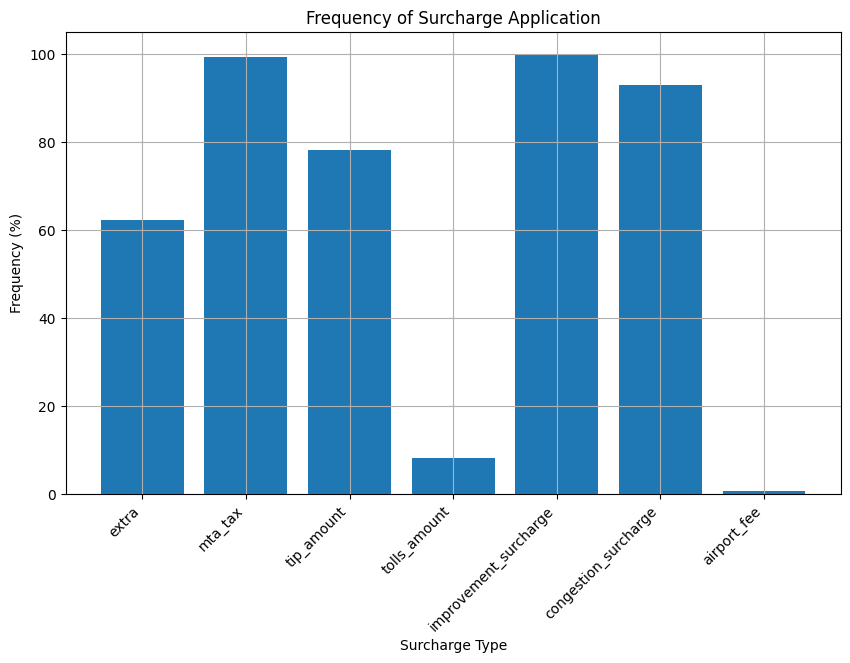

In [114]:
# How often is each surcharge applied?
surcharge_cols = ['extra', 'mta_tax', 'tip_amount', 'tolls_amount', 'improvement_surcharge', 'congestion_surcharge', 'airport_fee']

surcharge_frequency = df[surcharge_cols].astype(bool).sum() / len(df) * 100

print("Frequency of Surcharge Application (%):")
print(surcharge_frequency)

plt.figure(figsize=(10, 6))
plt.bar(surcharge_frequency.index, surcharge_frequency.values)
plt.title('Frequency of Surcharge Application')
plt.xlabel('Surcharge Type')
plt.ylabel('Frequency (%)')
plt.xticks(rotation=45, ha='right')
plt.grid(True)
plt.show()

## **4** Conclusion
<font color = red>[15 marks]</font> <br>

### **4.1** Final Insights and Recommendations
<font color = red>[15 marks]</font> <br>

Conclude your analyses here. Include all the outcomes you found based on the analysis.

Based on the insights, frame a concluding story explaining suitable parameters such as location, time of the day, day of the week etc. to be kept in mind while devising a strategy to meet customer demand and optimise supply.

**4.1.1** <font color = red>[5 marks]</font> <br>
Recommendations to optimize routing and dispatching based on demand patterns and operational inefficiencies

**Key Insights:**

Time-Based Trends: Demand peaks are observed during rush hours, weekends, and certain months, with a noticeable increase in nighttime activity in areas known for entertainment and nightlife.

Fare Dynamics: Trip fares are strongly linked to travel distance and duration. Shared rides may benefit from lower fares, and tipping behavior appears influenced by trip-related factors.

Location Patterns: Areas like airports, transit hubs, and major attractions show consistently high pickup volumes. Some neighborhoods experience mismatches between pickups and drop-offs. Nightlife districts show elevated activity during late hours.

Vendor & Surcharge Trends: Fare structures vary across vendors. Certain surcharges are applied frequently, and tiered pricing models are evident based on distance traveled.

**Strategic Recommendations:**

Demand Management:

Prioritize resource allocation in zones and time slots with consistently high demand.
Expand availability during late hours in nightlife districts.
Customize services for group and shared rides to appeal to cost-conscious customers.

Supply Optimization:

Increase taxi presence in busy areas, particularly during known peak times.
Explore flexible pricing models that adjust based on demand and ride specifics.
Promote repositioning of taxis to areas with lower supply.
Introduce incentive schemes for drivers to operate in underserved regions or off-peak hours.

Enhancing Rider Experience:

Invest in driver training and service quality monitoring.
Provide multiple payment methods for customer convenience.
Highlight and promote shared ride options to reduce costs and traffic.

Ongoing Improvements:

Use continuous data monitoring and passenger feedback to refine strategies.
Work collaboratively with municipal agencies to resolve urban transport issues.

**Final Takeaway:**

By leveraging insights from data, taxi operators in New York City can better align their services with passenger needs. Through strategic deployment, tailored pricing, and a focus on customer satisfaction, they can improve operational efficiency and deliver a superior transportation experience across the city.

**4.1.2** <font color = red>[5 marks]</font> <br>

Suggestions on strategically positioning cabs across different zones to make best use of insights uncovered by analysing trip trends across time, days and months.

Strategic Cab Positioning:

Time-Based: Adjust cab deployment based on rush hours, nighttime demand, midday lulls, and monthly trends.
Day-Based: Focus on business districts during weekdays and entertainment/residential areas during weekends. Adapt to special events.
Zone-Based: Prioritize high-demand zones, address pickup/dropoff imbalances, and increase presence in nighttime hotspots.
Data-Driven: Use real-time data, predictive models, and ride-hailing platforms for dynamic positioning.
Collaboration: Communicate with drivers and partner with city officials for optimized operations.
Technology: Leverage GPS tracking, heatmaps, and data analytics dashboards for strategic insights.

By implementing these strategies, taxi companies and drivers can optimize cab positioning to meet customer demand, minimize wait times, and enhance efficiency in NYC.

**4.1.3** <font color = red>[5 marks]</font> <br>
Propose data-driven adjustments to the pricing strategy to maximize revenue while maintaining competitive rates with other vendors.

**Data-Informed Pricing Strategies:**

Real-Time Dynamic Pricing:
 Modify fare structures based on current demand, availability of taxis, and traffic flow. Introduce higher rates during peak times and offer reduced fares during slower periods to balance supply and demand.

Structured Fare Tiers: Keep pricing attractive for short-distance travel, while applying tiered fare levels for longer trips. Consider differentiating prices by geographic zones to better reflect operational costs and customer expectations.

Ride-Sharing Incentives:
Promote shared ride options with group discounts to increase vehicle utilization and provide budget-friendly alternatives for passengers.

Surcharge Strategy:
Evaluate how often surcharges are applied and consider adding peak-period surcharges when necessary. Maintain clarity and transparency to build trust with riders.

Market Analysis:
Keep track of competitor fare models and adjust pricing accordingly. Emphasize the unique benefits of your service to justify premium charges when needed.

Ongoing Evaluation:
Use continuous data collection, customer behavior analysis, and A/B testing to refine and optimize pricing approaches for both profitability and customer satisfaction.